<a href="https://colab.research.google.com/github/DataDoggo215/Predicting_BitcoinPrices/blob/main/BitPredict_time_series_forecastng.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Will Bitcoin prices remain on the downward trend or will it go back up?

We're going to be using the historical price data of Bitcoin to try and predict the future price of Bitcoin, we downloaded the data from here: https://finance.yahoo.com/quote/BTC-USD/. I downloaded the price data and uploaded it to my google drive in a csv format.

#Exploratory Data Analysis

In [1]:
#Mount to Google Drive
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
# Import with pandas
import pandas as pd 
# Let's read in our Bitcoin data and parse the dates
df = pd.read_csv('/content/gdrive/My Drive/BTC_prices.csv',
                 parse_dates=["Date"],
                 index_col=["Date"]) # prase the date column and tell pandas column 1 is a datetime 

df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800
2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200
2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700
2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600
2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100


In [3]:
df.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-06-21,20594.294922,21620.628906,20415.062500,20710.597656,20710.597656,28970212744
2022-06-22,20719.414063,20835.750000,19848.078125,19987.029297,19987.029297,28574793478
2022-06-23,19986.607422,21135.761719,19950.117188,21085.876953,21085.876953,26188097173
2022-06-24,21084.648438,21472.917969,20777.511719,21231.656250,21231.656250,24957784918
2022-06-25,21241.992188,21327.351563,21167.322266,21236.939453,21236.939453,24427481088


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2839 entries, 2014-09-17 to 2022-06-25
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       2839 non-null   float64
 1   High       2839 non-null   float64
 2   Low        2839 non-null   float64
 3   Close      2839 non-null   float64
 4   Adj Close  2839 non-null   float64
 5   Volume     2839 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 155.3 KB


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2839 entries, 2014-09-17 to 2022-06-25
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       2839 non-null   float64
 1   High       2839 non-null   float64
 2   Low        2839 non-null   float64
 3   Close      2839 non-null   float64
 4   Adj Close  2839 non-null   float64
 5   Volume     2839 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 155.3 KB


In [6]:
len(df)

2839

In [7]:
# Only want closing price for each day
bitcoin_prices = pd.DataFrame(df["Adj Close"]).rename(columns={"Adj Close": "Price"})
bitcoin_prices.head()

,Price
Date,
2014-09-17,457.334015
2014-09-18,424.440002
2014-09-19,394.795990
2014-09-20,408.903992
2014-09-21,398.821014


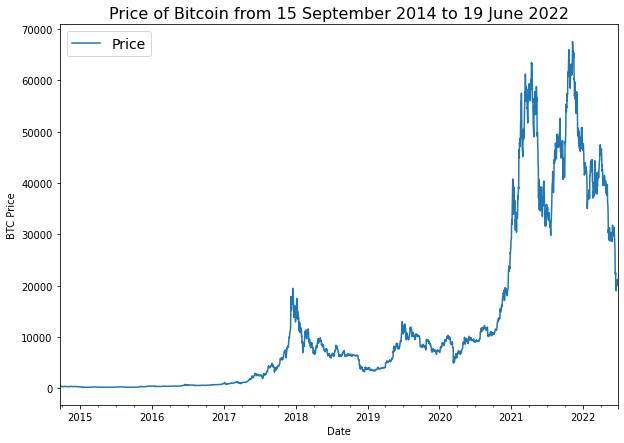

In [8]:
import matplotlib.pyplot as plt
bitcoin_prices.plot(figsize=(10, 7))
plt.ylabel("BTC Price")
plt.title("Price of Bitcoin from 15 September 2014 to 19 June 2022", fontsize=16)
plt.legend(fontsize=14);

Importing time series data with Python's CSV module

In [9]:
# Importing and formatting historical Bitcoin data with Python
import csv
from datetime import datetime

timesteps = []
btc_price = []
with open('/content/gdrive/My Drive/BTC_prices.csv', 'r') as f:
  csv_reader = csv.reader(f, delimiter=",")
  next(csv_reader) # skip first line (this gets rid of the column titles)
  for line in csv_reader:
    timesteps.append(datetime.strptime(line[0], "%Y-%m-%d")) # get the dates as dates (not strings)
    btc_price.append(float(line[5])) # get the adj closing price as float

# View first 10 of each
timesteps[:10], btc_price[:10]

([datetime.datetime(2014, 9, 17, 0, 0),
  datetime.datetime(2014, 9, 18, 0, 0),
  datetime.datetime(2014, 9, 19, 0, 0),
  datetime.datetime(2014, 9, 20, 0, 0),
  datetime.datetime(2014, 9, 21, 0, 0),
  datetime.datetime(2014, 9, 22, 0, 0),
  datetime.datetime(2014, 9, 23, 0, 0),
  datetime.datetime(2014, 9, 24, 0, 0),
  datetime.datetime(2014, 9, 25, 0, 0),
  datetime.datetime(2014, 9, 26, 0, 0)],
 [457.334015,
  424.440002,
  394.79599,
  408.903992,
  398.821014,
  402.152008,
  435.790985,
  423.204987,
  411.574005,
  404.424988])

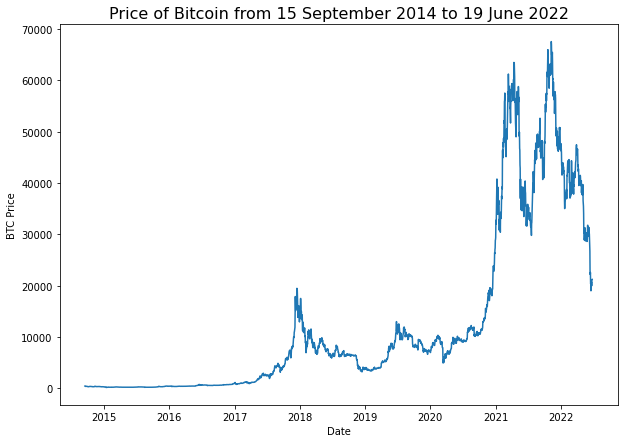

In [10]:
# Plot from CSV
import matplotlib.pyplot as plt
# import numpy as np
plt.figure(figsize=(10,7))
plt.plot(timesteps, btc_price)
plt.ylabel("BTC Price")
plt.title("Price of Bitcoin from 15 September 2014 to 19 June 2022", fontsize=16)
plt.xlabel("Date");

**Format data part 1: Create train and test sets of our time series data**

⚠ Wrong Way to do it!

In [11]:
bitcoin_prices[:5]

,Price
Date,
2014-09-17,457.334015
2014-09-18,424.440002
2014-09-19,394.795990
2014-09-20,408.903992
2014-09-21,398.821014


In [12]:
# Get bitcoin date array
timesteps = bitcoin_prices.index.to_numpy()
prices = bitcoin_prices["Price"].to_numpy()

timesteps[:10], prices[:10]

(array(['2014-09-17T00:00:00.000000000', '2014-09-18T00:00:00.000000000',
        '2014-09-19T00:00:00.000000000', '2014-09-20T00:00:00.000000000',
        '2014-09-21T00:00:00.000000000', '2014-09-22T00:00:00.000000000',
        '2014-09-23T00:00:00.000000000', '2014-09-24T00:00:00.000000000',
        '2014-09-25T00:00:00.000000000', '2014-09-26T00:00:00.000000000'],
       dtype='datetime64[ns]'),
 array([457.334015, 424.440002, 394.79599 , 408.903992, 398.821014,
        402.152008, 435.790985, 423.204987, 411.574005, 404.424988]))

In [13]:
# Wrong way to make train/test sets for time series data
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(timesteps, # dates
                                                    prices, # BTC prices
                                                    test_size=0.2,
                                                    random_state=42)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((2271,), (568,), (2271,), (568,))

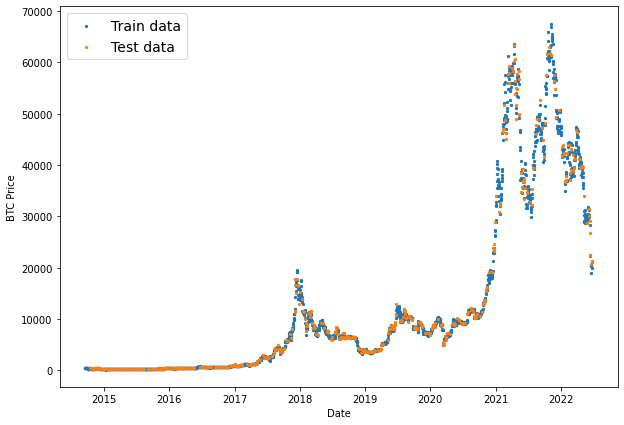

In [14]:
# Let's plot wrong train and test splits
plt.figure(figsize=(10, 7))
plt.scatter(X_train, y_train, s=5, label="Train data")
plt.scatter(X_test, y_test, s=5, label="Test data")
plt.xlabel("Date")
plt.ylabel("BTC Price")
plt.legend(fontsize=14)
plt.show();

✅ Correct way to do split

In [15]:
# Create train and test splits the right way for time series data
split_size = int(0.8 * len(prices)) # 80% train, 20% test - you can change these values as needed, e.g. 90/10, 95/5

# Create train data splits (everything before the split)
X_train, y_train = timesteps[:split_size], prices[:split_size]

# Create test data splits (everything beyond the split)
X_test, y_test = timesteps[split_size:], prices[split_size:]

len(X_train), len(X_test), len(y_train), len(y_test)

(2271, 568, 2271, 568)

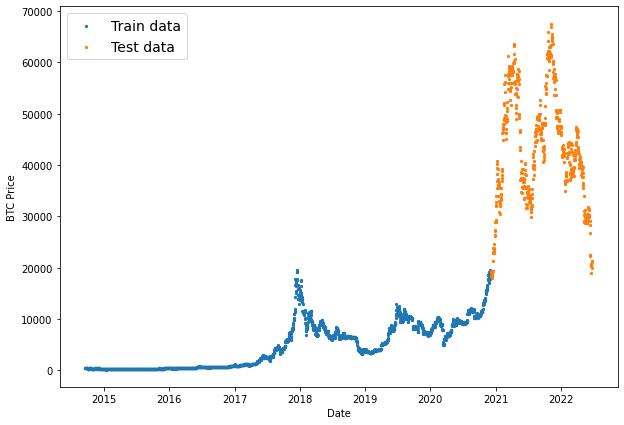

In [16]:
# Plot correctly made splits
plt.figure(figsize=(10,7))
plt.scatter(X_train, y_train, s=5, label="Train data")
plt.scatter(X_test, y_test, s=5, label="Test data")
plt.xlabel("Date")
plt.ylabel("BTC Price")
plt.legend(fontsize=14)
plt.show();

Let's create a plotting function so we don't have to do it each time.

In [17]:
# Create a function to plot time series data
def plot_time_series(timesteps, values, format=".", start=0, end=None, label=None):
  """
  Plots timesteps (a series of points in time) against values (a series of values across timesteps).

  Parameters
  ----------
  timesteps : array of timestep values
  values : array of values across time
  format : style of plot, default "."
  start : where to start the plot (setting a value will index from start of timesteps & values)
  end : where to end the plot (similar to start but for the end)
  label : label to show on plot about values, default None 
  """
  # Plot the series
  plt.plot(timesteps[start:end], values[start:end], format, label=label)
  plt.xlabel("Time")
  plt.ylabel("BTC Price")
  if label:
    plt.legend(fontsize=14) # make label bigger
  plt.grid(True)

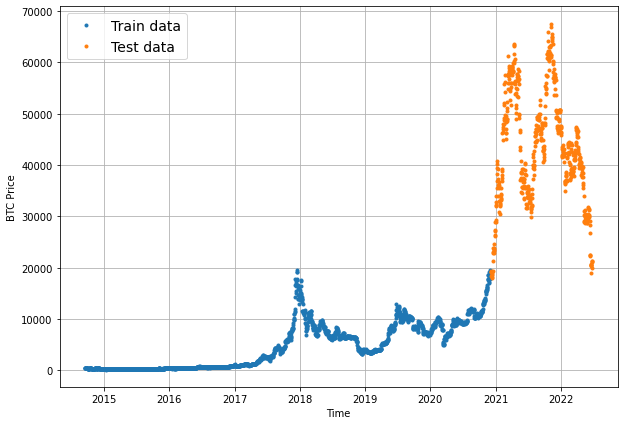

In [18]:
# Test out plotting function
plt.figure(figsize=(10, 7))
plot_time_series(timesteps=X_train, values=y_train, label="Train data")
plot_time_series(timesteps=X_test, values=y_test, label="Test data")

#Modeling

We've got some Bitcoin historical data, to model it, let's run a series of modelling experiments and see which model performs best.

Horizon = number of timesteps into the future we're going to predict

Window size = number of timesteps we're going to use to predict horizon

The prediction at timestep t (y-hat) is equal to the value at timestep t-1 (previous timestep) - this is for a horizon of 1.

Modelling experiments we're running:

*   0 Naïve model (baseline)
*   1 Dense model, horizon = 1, window = 7
*   2 Same as 1, horizon = 1, window = 30
*   3 Same as 1, horizon = 7, window = 30
*   4 Conv1D
*   5 LSTM
*   6 Same as 1 (but with multivariate data)
*   7 N-BEATs Algorithm
*   8 Ensemble (multiple models optimized on different loss functions)
*   9 Future prediction model (model to predict future values)
*   10 Same as 1 (but with turkey 🦃 data introduced)

## Model 0: Naive forecast (baseline)

In [19]:
y_test[:10]

array([19154.230469, 19345.121094, 19191.630859, 18321.144531,
       18553.916016, 18264.992188, 18058.904297, 18803.65625 ,
       19142.382813, 19246.644531])

In [20]:
# Create a naive forecast 
naive_forecast = y_test[:-1]

naive_forecast[:10], naive_forecast[-10:]

(array([19154.230469, 19345.121094, 19191.630859, 18321.144531,
        18553.916016, 18264.992188, 18058.904297, 18803.65625 ,
        19142.382813, 19246.644531]),
 array([22572.839844, 20381.650391, 20471.482422, 19017.642578,
        20553.271484, 20599.537109, 20710.597656, 19987.029297,
        21085.876953, 21231.65625 ]))

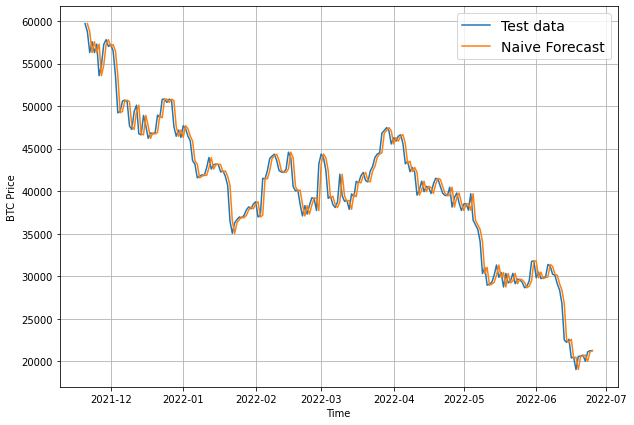

In [21]:
# Plot naive forecast
plt.figure(figsize=(10, 7))
# plot_time_series(timesteps=X_train, values=y_train, label="Train data")
plot_time_series(timesteps=X_test, values=y_test, start=350, format="-", label="Test data")
plot_time_series(timesteps=X_test[1:], values=naive_forecast, start=350, format="-", label="Naive Forecast")

**Time Series Model Evaluation**

The main thing we're evaluating here is: how do our model's forecasts (y_pred) compare against the actual values (y_true or ground truth values)?

A few common regression metrics (which can also be used for time series forecasting):

*   MAE - mean absolute error
*   MSE - mean squared error
*   RMSE - root mean square error
*   MAPE/sMAPE - (symmetric) mean absolute percentage error
*   MASE - mean absolute scaled error

In [22]:
import tensorflow as tf

In [23]:
# MASE implementation
def mean_absolute_scaled_error(y_true, y_pred):
  """
  Implement MASE (assuming no seasonality of data).
  """
  mae = tf.reduce_mean(tf.abs(y_true-y_pred))

  # Find MAE of naive forecast (no seasonality)
  mae_naive_no_season = tf.reduce_mean(tf.abs(y_true[1:] - y_true[:-1])) # our seasonality is 1 day (hence the shift of 1)

  return mae / mae_naive_no_season

In [24]:
# Test MASE (this value should = 1 or be very close to 1 with the naive forecast)
mean_absolute_scaled_error(y_true=y_test[1:], y_pred=naive_forecast).numpy()

0.9985067190187337

In [25]:
# Create a function to take in model predictions and truth values and return evaluation metrics
def evaluate_preds(y_true, y_pred):
  # Make sure float32 datatype (for metric calculations)
  y_true = tf.cast(y_true, dtype=tf.float32)
  y_pred = tf.cast(y_pred, dtype=tf.float32)

  # Calculate various evaluation metrics 
  mae = tf.keras.metrics.mean_absolute_error(y_true, y_pred)
  mse = tf.keras.metrics.mean_squared_error(y_true, y_pred)
  rmse = tf.sqrt(mse)
  mape = tf.keras.metrics.mean_absolute_percentage_error(y_true, y_pred)
  mase = mean_absolute_scaled_error(y_true, y_pred)

  return {"mae": mae.numpy(),
          "mse": mse.numpy(),
          "rmse": rmse.numpy(),
          "mape": mape.numpy(),
          "mase": mase.numpy()}

In [26]:
naive_results = evaluate_preds(y_true=y_test[1:],
                               y_pred=naive_forecast)

naive_results

{'mae': 1243.2716,
 'mape': 2.9606142,
 'mase': 0.9985068,
 'mse': 2920421.8,
 'rmse': 1708.9241}

In [27]:
naive_forecast[-10:]

array([22572.839844, 20381.650391, 20471.482422, 19017.642578,
       20553.271484, 20599.537109, 20710.597656, 19987.029297,
       21085.876953, 21231.65625 ])

In [28]:
tf.reduce_mean(y_test)

<tf.Tensor: shape=(), dtype=float64, numpy=43119.62636178345>

In [29]:
tf.reduce_min(y_test), tf.reduce_max(y_test)

(<tf.Tensor: shape=(), dtype=float64, numpy=18058.904297>,
 <tf.Tensor: shape=(), dtype=float64, numpy=67566.828125>)

Resource for other time series forecasting modeling: https://dev.mrdbourke.com/tensorflow-deep-learning/10_time_series_forecasting_in_tensorflow/#other-kinds-of-time-series-forecasting-models-which-can-be-used-for-baselines-and-actual-forecasts

**Creating windows for our dataset**

We window our time series dataset to turn our data into a supervised learning problem.

In [30]:
# What we want to do with our Bitcoin data
print(f"We want to use: {btc_price[:7]} to predict this: {btc_price[7]}")

We want to use: [457.334015, 424.440002, 394.79599, 408.903992, 398.821014, 402.152008, 435.790985] to predict this: 423.204987


In [31]:
# Let's setup global variables for window and horizon size
HORIZON = 1 # predict next 1 day
WINDOW_SIZE = 7 # use the past week of Bitcoin data to make the prediction

In [32]:
# Create function to label windowed data
def get_labelled_windows(x, horizon=HORIZON):
  """
  Creates labels for windowed dataset.

  E.g. if horizon=1
  Input: [0, 1, 2, 3, 4, 5, 6, 7] -> Output: ([0, 1, 2, 3, 4, 5, 6], [7])
  """
  return x[:, :-horizon], x[:, -horizon:]

In [33]:
# Test out the window labelling function
test_window, test_label = get_labelled_windows(tf.expand_dims(tf.range(8), axis=0))
print(f"Window: {tf.squeeze(test_window).numpy()} -> Label: {tf.squeeze(test_label).numpy()}")

Window: [0 1 2 3 4 5 6] -> Label: 7


We could create a a python loop to create windows for our entire data set, but there are better methods for larger data. To speed things up, we'll leverage NumPy's array indexing - https://numpy.org/doc/stable/reference/arrays.indexing.html. We could also do something similiar with keras: https://www.tensorflow.org/api_docs/python/tf/keras/utils/timeseries_dataset_from_array

In [34]:
import numpy as np

# Create function to view NumPy arrays as windows
def make_windows(x, window_size=WINDOW_SIZE, horizon=HORIZON):
  """
  Turns a 1D array into a 2D array of sequential labelled windows of window_size with horizon size labels.
  """
  # 1. Create a window of specific window_size (add the horzion on the end for labelling later)
  window_step = np.expand_dims(np.arange(window_size+horizon), axis=0)

  # 2. Create a 2D array of multiple window steps (minus 1 to account for 0 indexing)
  window_indexes = window_step + np.expand_dims(np.arange(len(x)-(window_size+horizon-1)), axis=0).T # create 2D array of windows of size window_size
  # print(f"Window indexes:\n {window_indexes, window_indexes.shape}")

  # 3. Index on the target array (a time series) with 2D array of multiple window steps
  windowed_array = x[window_indexes]
  # print(windowed_array)

  # 4. Get the labelled windows
  windows, labels = get_labelled_windows(windowed_array, horizon=horizon)
  return windows, labels

In [35]:
full_windows, full_labels = make_windows(prices, window_size=WINDOW_SIZE, horizon=HORIZON)
len(full_windows), len(full_labels)

(2832, 2832)

In [36]:
# View the first 3 windows/labels
for i in range(3):
  print(f"Window: {full_windows[i]} -> Label: {full_labels[i]}")

Window: [457.334015 424.440002 394.79599  408.903992 398.821014 402.152008
 435.790985] -> Label: [423.204987]
Window: [424.440002 394.79599  408.903992 398.821014 402.152008 435.790985
 423.204987] -> Label: [411.574005]
Window: [394.79599  408.903992 398.821014 402.152008 435.790985 423.204987
 411.574005] -> Label: [404.424988]


In [37]:
# View the last 3 windows/labels
for i in range(3):
  print(f"Window: {full_windows[i-3]} -> Label: {full_labels[i-3]}")

Window: [20381.650391 20471.482422 19017.642578 20553.271484 20599.537109
 20710.597656 19987.029297] -> Label: [21085.876953]
Window: [20471.482422 19017.642578 20553.271484 20599.537109 20710.597656
 19987.029297 21085.876953] -> Label: [21231.65625]
Window: [19017.642578 20553.271484 20599.537109 20710.597656 19987.029297
 21085.876953 21231.65625 ] -> Label: [21236.939453]


**Turning windows into training and test sets**

In [38]:
full_windows[:5], full_labels[:5]

(array([[457.334015, 424.440002, 394.79599 , 408.903992, 398.821014,
         402.152008, 435.790985],
        [424.440002, 394.79599 , 408.903992, 398.821014, 402.152008,
         435.790985, 423.204987],
        [394.79599 , 408.903992, 398.821014, 402.152008, 435.790985,
         423.204987, 411.574005],
        [408.903992, 398.821014, 402.152008, 435.790985, 423.204987,
         411.574005, 404.424988],
        [398.821014, 402.152008, 435.790985, 423.204987, 411.574005,
         404.424988, 399.519989]]), array([[423.204987],
        [411.574005],
        [404.424988],
        [399.519989],
        [377.181   ]]))

In [39]:
# Make the train/test splits
def make_train_test_splits(windows, labels, test_split=0.2):
  """
  Splits matching pairs of winodws and labels into train and test splits.
  """
  split_size = int(len(windows) * (1-test_split)) # this will default to 80% train/20% test
  train_windows = windows[:split_size]
  train_labels = labels[:split_size]
  test_windows = windows[split_size:]
  test_labels = labels[split_size:]
  return train_windows, test_windows, train_labels, test_labels

In [40]:
# Create train and test windows 
train_windows, test_windows, train_labels, test_labels = make_train_test_splits(full_windows, full_labels)
len(train_windows), len(test_windows), len(train_labels), len(test_labels)

(2265, 567, 2265, 567)

In [41]:
train_windows[:5], train_labels[:5]

(array([[457.334015, 424.440002, 394.79599 , 408.903992, 398.821014,
         402.152008, 435.790985],
        [424.440002, 394.79599 , 408.903992, 398.821014, 402.152008,
         435.790985, 423.204987],
        [394.79599 , 408.903992, 398.821014, 402.152008, 435.790985,
         423.204987, 411.574005],
        [408.903992, 398.821014, 402.152008, 435.790985, 423.204987,
         411.574005, 404.424988],
        [398.821014, 402.152008, 435.790985, 423.204987, 411.574005,
         404.424988, 399.519989]]), array([[423.204987],
        [411.574005],
        [404.424988],
        [399.519989],
        [377.181   ]]))

In [42]:
test_windows[:5], test_labels[:5]

(array([[18177.484375, 19625.835938, 18802.998047, 19201.091797,
         19445.398438, 18699.765625, 19154.230469],
        [19625.835938, 18802.998047, 19201.091797, 19445.398438,
         18699.765625, 19154.230469, 19345.121094],
        [18802.998047, 19201.091797, 19445.398438, 18699.765625,
         19154.230469, 19345.121094, 19191.630859],
        [19201.091797, 19445.398438, 18699.765625, 19154.230469,
         19345.121094, 19191.630859, 18321.144531],
        [19445.398438, 18699.765625, 19154.230469, 19345.121094,
         19191.630859, 18321.144531, 18553.916016]]), array([[19345.121094],
        [19191.630859],
        [18321.144531],
        [18553.916016],
        [18264.992188]]))

In [43]:
# Check to see if train labels are the same (before and after window split)
np.array_equal(np.squeeze(train_labels[:-HORIZON-1]), y_train[WINDOW_SIZE:])

False

In [44]:
import os

# Create a function to implement a ModelCheckpoint callback with a specific filename 
def create_model_checkpoint(model_name, save_path="model_experiments"):
  return tf.keras.callbacks.ModelCheckpoint(filepath=os.path.join(save_path, model_name),
                                            monitor="val_loss",
                                            verbose=0, # only output a limited amount of text
                                            save_best_only=True)

## Model 1: Dense model (window = 7, horizon = 1)

In [45]:
import tensorflow as tf
from tensorflow.keras import layers

# Set random seed for as reproducible results as possible
tf.random.set_seed(42)

# 1. Construct model
model_1 = tf.keras.Sequential([
  layers.Dense(128, activation="relu"),
  layers.Dense(HORIZON, activation="linear") # linear activation is the same as having no activation               
], name="model_1_dense") # name our model so we can save it

# 2. Compile
model_1.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["mae", "mse"])

# 3. Fit the model
model_1.fit(x=train_windows,
            y=train_labels,
            epochs=100,
            verbose=1,
            batch_size=128,
            validation_data=(test_windows, test_labels),
            callbacks=[create_model_checkpoint(model_name=model_1.name)])

Epoch 1/100
18/18 [==============================] - 3s 40ms/step - loss: 1164.2390 - mae: 1164.2390 - mse: 3986678.5000 - val_loss: 5685.6978 - val_mae: 5685.6978 - val_mse: 42219308.0000
Epoch 2/100
18/18 [==============================] - 0s 26ms/step - loss: 346.1332 - mae: 346.1332 - mse: 387497.9375 - val_loss: 2459.9814 - val_mae: 2459.9814 - val_mse: 9993545.0000
Epoch 3/100
18/18 [==============================] - 0s 25ms/step - loss: 243.4594 - mae: 243.4594 - mse: 233532.2031 - val_loss: 2151.3596 - val_mae: 2151.3596 - val_mse: 7818065.0000
Epoch 4/100
18/18 [==============================] - 0s 26ms/step - loss: 222.2670 - mae: 222.2670 - mse: 203481.8906 - val_loss: 1974.1843 - val_mae: 1974.1843 - val_mse: 6568369.5000
Epoch 5/100
18/18 [==============================] - 0s 25ms/step - loss: 211.4971 - mae: 211.4971 - mse: 186811.5625 - val_loss: 1910.9822 - val_mae: 1910.9822 - val_mse: 6121889.5000
Epoch 6/100
18/18 [==============================] - 0s 25ms/step - los

In [46]:
# Evaluate model on test data
model_1.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 2ms/step - loss: 1260.2423 - mae: 1260.2423 - mse: 3001536.2500


[1260.2423095703125, 1260.2423095703125, 3001536.25]

In [47]:
# Load in saved best performing model_1 and evaluate it on test data
model_1 = tf.keras.models.load_model("model_experiments/model_1_dense/")
model_1.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 2ms/step - loss: 1256.6903 - mae: 1256.6903 - mse: 2986000.0000


[1256.6903076171875, 1256.6903076171875, 2986000.0]

**Making forecasts with a model (on the test dataset)**

In [48]:
def make_preds(model, input_data):
  """
  Uses model to make predictions input_data.
  """
  forecast = model.predict(input_data)
  return tf.squeeze(forecast) # return 1D array of predictions

In [49]:
# Make predictions using model_1 on the test dataset and view results
model_1_preds = make_preds(model_1, test_windows) 
len(model_1_preds), model_1_preds[:10]

(567, <tf.Tensor: shape=(10,), dtype=float32, numpy=
 array([19004.277, 19354.83 , 19269.666, 18437.643, 18517.174, 18312.445,
        18105.201, 18642.549, 19159.504, 19274.34 ], dtype=float32)>)

In [50]:
tf.squeeze(test_labels).shape, model_1_preds.shape

(TensorShape([567]), TensorShape([567]))

In [51]:
# Evaluate preds
model_1_results = evaluate_preds(y_true=tf.squeeze(test_labels),
                                 y_pred=model_1_preds)
model_1_results

{'mae': 1256.6902,
 'mape': 2.9990795,
 'mase': 1.0092837,
 'mse': 2986000.2,
 'rmse': 1728.0046}

In [52]:
naive_results

{'mae': 1243.2716,
 'mape': 2.9606142,
 'mase': 0.9985068,
 'mse': 2920421.8,
 'rmse': 1708.9241}

In [53]:
test_labels.shape

(567, 1)

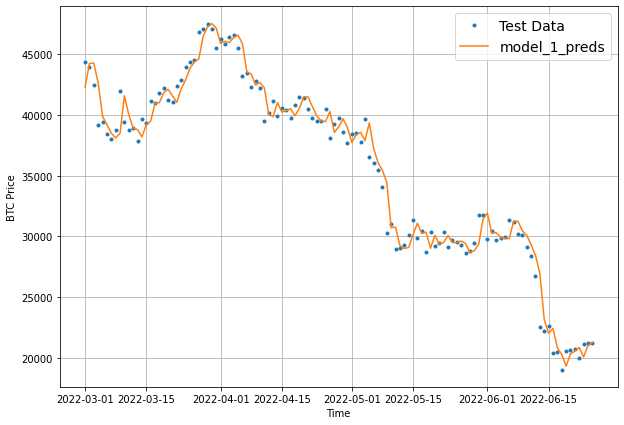

In [54]:
# Let's plot our model 1 predictions
offset = 450
plt.figure(figsize=(10, 7))
# Account for the test_window offset and index into test_labels to ensure correct plotting
plot_time_series(timesteps=X_test[-len(test_windows):], 
                 values=test_labels[:, 0], 
                 start=offset, 
                 label="Test Data")

plot_time_series(timesteps=X_test[-len(test_windows):],
                 values=model_1_preds,
                 start=offset, 
                 format="-",
                 label="model_1_preds")

## Model 2: Dense (window = 30, horizon = 1)

In [55]:
HORIZON = 1 # predict one step at a time (one day of Bitcoin prices)
WINDOW_SIZE = 30 # use 30 timesteps in past

In [56]:
# Make windowed data with appropriate horizon and window sizes
full_windows, full_labels = make_windows(prices, window_size=WINDOW_SIZE, horizon=HORIZON)
len(full_windows), len(full_labels)

(2809, 2809)

In [57]:
# Make train and testing windows
train_windows, test_windows, train_labels, test_labels = make_train_test_splits(windows=full_windows,
                                                                                labels=full_labels,
                                                                                test_split=0.2)
len(train_windows), len(test_windows), len(train_labels), len(test_labels)

(2247, 562, 2247, 562)

In [58]:
tf.random.set_seed(42)

# Create model
model_2 = tf.keras.Sequential([
  layers.Dense(128, activation="relu"),
  layers.Dense(HORIZON)
], name="model_2_dense")

# Compile
model_2.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam())

# Fit
model_2.fit(train_windows,
            train_labels,
            epochs=100,
            batch_size=128,
            verbose=0,
            validation_data=(test_windows, test_labels),
            callbacks=[create_model_checkpoint(model_name=model_2.name)])

INFO:tensorflow:Assets written to: model_experiments/model_2_dense/assets
INFO:tensorflow:Assets written to: model_experiments/model_2_dense/assets
INFO:tensorflow:Assets written to: model_experiments/model_2_dense/assets
INFO:tensorflow:Assets written to: model_experiments/model_2_dense/assets
INFO:tensorflow:Assets written to: model_experiments/model_2_dense/assets
INFO:tensorflow:Assets written to: model_experiments/model_2_dense/assets
INFO:tensorflow:Assets written to: model_experiments/model_2_dense/assets
INFO:tensorflow:Assets written to: model_experiments/model_2_dense/assets
INFO:tensorflow:Assets written to: model_experiments/model_2_dense/assets
INFO:tensorflow:Assets written to: model_experiments/model_2_dense/assets
INFO:tensorflow:Assets written to: model_experiments/model_2_dense/assets
INFO:tensorflow:Assets written to: model_experiments/model_2_dense/assets
INFO:tensorflow:Assets written to: model_experiments/model_2_dense/assets
INFO:tensorflow:Assets written to: mod

In [59]:
# Evaluate model 2 on test data
model_2.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 2ms/step - loss: 1553.2253


1553.225341796875

In [60]:
# Load in the best performing model
model_2 = tf.keras.models.load_model("model_experiments/model_2_dense/")
model_2.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 2ms/step - loss: 1361.7251


1361.72509765625

In [61]:
# Get forecast predictions
model_2_preds = make_preds(model_2,
                           input_data=test_windows)

In [62]:
tf.squeeze(test_labels).shape, model_2_preds.shape

(TensorShape([562]), TensorShape([562]))

In [63]:
# Evaluate results for model 2 predictions
model_2_results = evaluate_preds(y_true=tf.squeeze(test_labels),
                                 y_pred=model_2_preds)
model_2_results

{'mae': 1361.725,
 'mape': 3.232889,
 'mase': 1.0866799,
 'mse': 3317766.5,
 'rmse': 1821.4736}

In [64]:
model_1_results

{'mae': 1256.6902,
 'mape': 2.9990795,
 'mase': 1.0092837,
 'mse': 2986000.2,
 'rmse': 1728.0046}

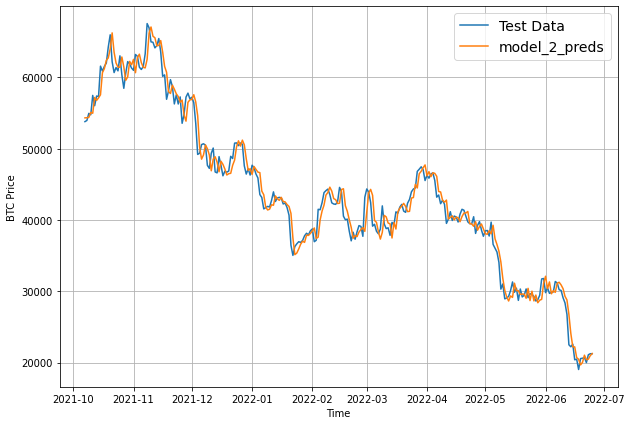

In [65]:
offset = 300
plt.figure(figsize=(10, 7))
# Account for test_window offset when plotting
plot_time_series(timesteps=X_test[-len(test_windows):], values=test_labels[:, 0], start=offset, format="-", label="Test Data")
plot_time_series(timesteps=X_test[-len(test_windows):], values=model_2_preds, start=offset, format="-", label="model_2_preds")

## Model 3: Dense (window = 30, horizon = 7)

In [66]:
prices[:10]

array([457.334015, 424.440002, 394.79599 , 408.903992, 398.821014,
       402.152008, 435.790985, 423.204987, 411.574005, 404.424988])

In [67]:
HORIZON = 7
WINDOW_SIZE = 30

full_windows, full_labels = make_windows(prices, window_size=WINDOW_SIZE, horizon=HORIZON)
len(full_windows), len(full_labels)

(2803, 2803)

In [68]:
train_windows, test_windows, train_labels, test_labels = make_train_test_splits(windows=full_windows,
                                                                                labels=full_labels)
len(train_windows), len(test_windows), len(train_labels), len(test_labels)

(2242, 561, 2242, 561)

In [69]:
tf.random.set_seed(42)

# Create model (same as model_1 except with different data input and output sizes)
model_3 = tf.keras.Sequential([
  layers.Dense(128, activation="relu"),
  layers.Dense(HORIZON)
], name="model_3_dense")

# Compile
model_3.compile(loss="MAE",
                optimizer=tf.keras.optimizers.Adam())

# Fit
model_3.fit(train_windows,
            train_labels,
            batch_size=128,
            epochs=100,
            verbose=0,
            validation_data=(test_windows, test_labels),
            callbacks=[create_model_checkpoint(model_name=model_3.name)])

INFO:tensorflow:Assets written to: model_experiments/model_3_dense/assets
INFO:tensorflow:Assets written to: model_experiments/model_3_dense/assets
INFO:tensorflow:Assets written to: model_experiments/model_3_dense/assets
INFO:tensorflow:Assets written to: model_experiments/model_3_dense/assets
INFO:tensorflow:Assets written to: model_experiments/model_3_dense/assets
INFO:tensorflow:Assets written to: model_experiments/model_3_dense/assets
INFO:tensorflow:Assets written to: model_experiments/model_3_dense/assets
INFO:tensorflow:Assets written to: model_experiments/model_3_dense/assets
INFO:tensorflow:Assets written to: model_experiments/model_3_dense/assets
INFO:tensorflow:Assets written to: model_experiments/model_3_dense/assets
INFO:tensorflow:Assets written to: model_experiments/model_3_dense/assets
INFO:tensorflow:Assets written to: model_experiments/model_3_dense/assets
INFO:tensorflow:Assets written to: model_experiments/model_3_dense/assets
INFO:tensorflow:Assets written to: mod

In [70]:
# Evaluate the model on the test data
model_3.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 2ms/step - loss: 2726.0942


2726.09423828125

In [71]:
# Load best version of model_3 and evaluate
model_3 = tf.keras.models.load_model("model_experiments/model_3_dense")
model_3.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 2ms/step - loss: 2707.4758


2707.475830078125

In [72]:
# Make predictions with model_3
model_3_preds = make_preds(model_3,
                           input_data=test_windows)
model_3_preds[:5]

<tf.Tensor: shape=(5, 7), dtype=float32, numpy=
array([[19075.668, 19480.832, 19378.518, 18981.13 , 18937.61 , 19620.945,
        19240.205],
       [19230.098, 19151.805, 19568.88 , 19179.617, 19091.55 , 19797.227,
        19358.346],
       [19262.92 , 19062.367, 19546.348, 18768.295, 19570.143, 19485.5  ,
        19121.328],
       [19296.664, 19114.797, 19083.117, 18994.746, 19295.287, 19268.475,
        19304.953],
       [19053.264, 19154.604, 18613.943, 18968.61 , 18582.654, 18909.738,
        19090.926]], dtype=float32)>

In [73]:
model_2_results

{'mae': 1361.725,
 'mape': 3.232889,
 'mase': 1.0866799,
 'mse': 3317766.5,
 'rmse': 1821.4736}

In [74]:
model_3_preds.shape, model_2_preds.shape, model_1_preds.shape

(TensorShape([561, 7]), TensorShape([562]), TensorShape([567]))

In [75]:
# Evaluate model_3 results (these are going multi-dimensional because we're trying to predict more than one timestep at a time)
model_3_results = evaluate_preds(y_true=tf.squeeze(test_labels),
                                 y_pred=model_3_preds)
model_3_results

{'mae': array([  673.49274,   720.12805,   667.9847 ,   442.10184,   805.49384,
         1569.5334 ,  2593.076  ,  2948.51   ,  3083.2449 ,  3276.924  ,
         3567.2476 ,  2748.0142 ,  1507.8245 ,   733.91797,   803.3471 ,
         1136.9392 ,  1424.748  ,  1772.4208 ,  2641.5815 ,  3052.2964 ,
         2885.4148 ,  2618.578  ,  2604.1694 ,  2892.9363 ,  3503.293  ,
         3544.2937 ,  4271.924  ,  5349.2354 ,  4527.8926 ,  4465.8037 ,
         4654.897  ,  3759.0894 ,  2716.2449 ,  2297.1206 ,  3709.8572 ,
         5235.309  ,  4549.775  ,  2185.3064 ,  1322.2489 ,  1325.6339 ,
         2774.5212 ,  3479.0396 ,  3684.5164 ,  2938.9768 ,  2573.391  ,
         2794.3406 ,  3647.2024 ,  1266.2542 ,  1339.6719 ,  1274.4688 ,
         1158.8555 ,  1494.983  ,  2188.398  ,  3704.6267 ,  2998.2896 ,
         2636.1697 ,  3054.0427 ,  3154.1802 ,  5480.0796 ,  5512.0024 ,
         5137.9077 ,  5759.2666 ,  6123.0015 ,  6767.469  ,  8250.865  ,
         4303.742  ,  1691.2377 ,  1975.0736

**Make our evaluation function work for larger horizons**

In [76]:
model_3.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 2ms/step - loss: 2707.4758


2707.475830078125

In [77]:
tf.reduce_mean(model_3_results["mae"]).numpy()

2707.4756

In [78]:
model_2_results["mae"].ndim

0

In [79]:
# Create a function to take in model predictions and truth values and return evaluation metrics
def evaluate_preds(y_true, y_pred):
  # Make sure float32 datatype (for metric calculations)
  y_true = tf.cast(y_true, dtype=tf.float32)
  y_pred = tf.cast(y_pred, dtype=tf.float32)

  # Calculate various evaluation metrics 
  mae = tf.keras.metrics.mean_absolute_error(y_true, y_pred)
  mse = tf.keras.metrics.mean_squared_error(y_true, y_pred)
  rmse = tf.sqrt(mse)
  mape = tf.keras.metrics.mean_absolute_percentage_error(y_true, y_pred)
  mase = mean_absolute_scaled_error(y_true, y_pred)

  # Account for different sized metrics (for longer horizons, we want to reduce metrics to a single value)
  if mae.ndim > 0:
    mae = tf.reduce_mean(mae)
    mse = tf.reduce_mean(mse)
    rmse = tf.reduce_mean(rmse)
    mape = tf.reduce_mean(mape)
    mase = tf.reduce_mean(mase)

  return {"mae": mae.numpy(),
          "mse": mse.numpy(),
          "rmse": rmse.numpy(),
          "mape": mape.numpy(),
          "mase": mase.numpy()}

In [80]:
# Get model_3 results aggregated to single values
model_3_results = evaluate_preds(y_true=tf.squeeze(test_labels),
                                 y_pred=model_3_preds)
model_3_results

{'mae': 2707.4756,
 'mape': 6.5101967,
 'mase': 2.1583228,
 'mse': 13235090.0,
 'rmse': 3099.4739}

In [81]:
model_3_preds[:5]

<tf.Tensor: shape=(5, 7), dtype=float32, numpy=
array([[19075.668, 19480.832, 19378.518, 18981.13 , 18937.61 , 19620.945,
        19240.205],
       [19230.098, 19151.805, 19568.88 , 19179.617, 19091.55 , 19797.227,
        19358.346],
       [19262.92 , 19062.367, 19546.348, 18768.295, 19570.143, 19485.5  ,
        19121.328],
       [19296.664, 19114.797, 19083.117, 18994.746, 19295.287, 19268.475,
        19304.953],
       [19053.264, 19154.604, 18613.943, 18968.61 , 18582.654, 18909.738,
        19090.926]], dtype=float32)>

In [82]:
test_labels[:]

array([[19345.121094, 19191.630859, 18321.144531, ..., 18264.992188,
        18058.904297, 18803.65625 ],
       [19191.630859, 18321.144531, 18553.916016, ..., 18058.904297,
        18803.65625 , 19142.382813],
       [18321.144531, 18553.916016, 18264.992188, ..., 18803.65625 ,
        19142.382813, 19246.644531],
       ...,
       [20471.482422, 19017.642578, 20553.271484, ..., 20710.597656,
        19987.029297, 21085.876953],
       [19017.642578, 20553.271484, 20599.537109, ..., 19987.029297,
        21085.876953, 21231.65625 ],
       [20553.271484, 20599.537109, 20710.597656, ..., 21085.876953,
        21231.65625 , 21236.939453]])

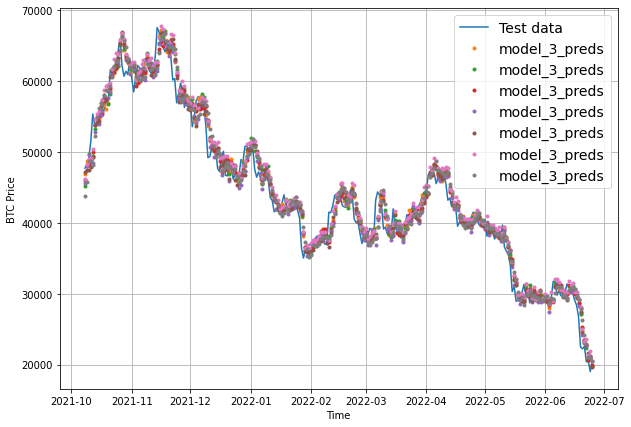

In [83]:
offset = 300
plt.figure(figsize=(10, 7))
plot_time_series(timesteps=X_test[-len(test_windows):], values=test_labels[:, 0], start=offset, format="-", label="Test data")
plot_time_series(timesteps=X_test[-len(test_windows):], values=model_3_preds, start=offset, label="model_3_preds")

In [84]:
model_3_preds[0]

<tf.Tensor: shape=(7,), dtype=float32, numpy=
array([19075.668, 19480.832, 19378.518, 18981.13 , 18937.61 , 19620.945,
       19240.205], dtype=float32)>

In [85]:
tf.reduce_mean(model_3_preds[0])

<tf.Tensor: shape=(), dtype=float32, numpy=19244.986>

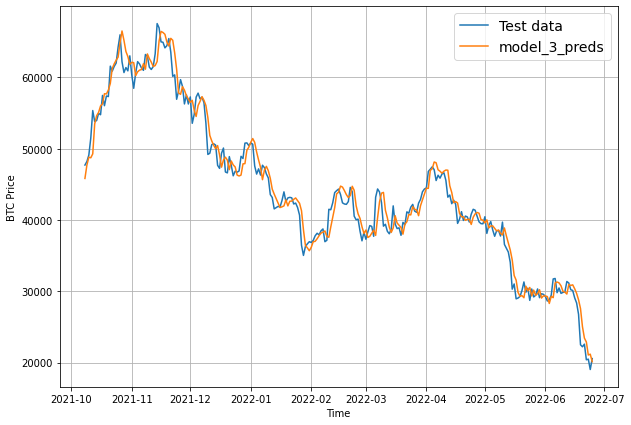

In [86]:
offset = 300
plt.figure(figsize=(10, 7))
plot_time_series(timesteps=X_test[-len(test_windows):], 
                 values=test_labels[:, 0], 
                 start=offset, 
                 format="-",
                 label="Test data")
plot_time_series(timesteps=X_test[-len(test_windows):], 
                 values=tf.reduce_mean(model_3_preds, axis=1), 
                 start=offset,
                 format="-", 
                 label="model_3_preds")

**Which model is performing the best?**

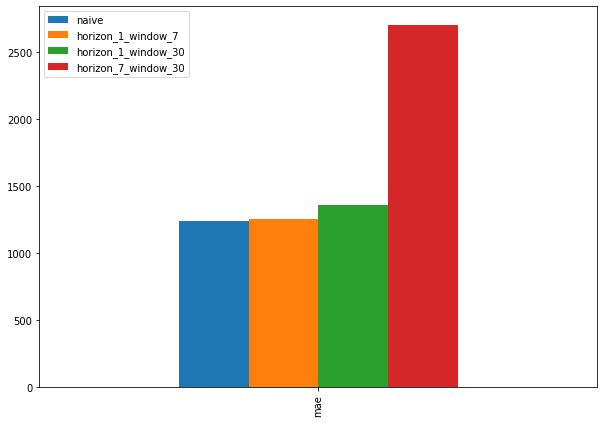

In [87]:
pd.DataFrame({"naive": naive_results["mae"],
              "horizon_1_window_7": model_1_results["mae"],
              "horizon_1_window_30": model_2_results["mae"],
              "horizon_7_window_30": model_3_results["mae"]}, index=["mae"]).plot(figsize=(10, 7), kind="bar");


Naive so far seems to be doing the best. This could be due to the pressence of autocorrelation in the data.  For more on how autocorrelation influences a model's predictions, see the article: https://towardsdatascience.com/how-not-to-use-machine-learning-for-time-series-forecasting-avoiding-the-pitfalls-19f9d7adf424

## Model 4: Conv1D

In [88]:
HORIZON = 1 # predict next day of Bitcoin prices
WINDOW_SIZE = 7 # use previous week worth data

In [89]:
# Create windowed data
full_windows, full_labels = make_windows(prices, window_size=WINDOW_SIZE, horizon=HORIZON)
len(full_windows), len(full_labels)

(2832, 2832)

In [90]:
# Create train/test sets
train_windows, test_windows, train_labels, test_labels = make_train_test_splits(full_windows, full_labels)
len(train_windows), len(train_labels), len(test_windows), len(test_labels)

(2265, 2265, 567, 567)

In [91]:
# Check data input shape
train_windows[0].shape # returns (WINDOW_SIZE, )

(7,)

To use the Conv1D layer, we need an input shape of: (batch_size, timesteps, input_dim)...

However our data isn't in that shape yet...

In [92]:
# Before we pass our data to the Conv1D layer, we have to reshape it in order to make sure it works
x = tf.constant(train_windows[0])
x

<tf.Tensor: shape=(7,), dtype=float64, numpy=
array([457.334015, 424.440002, 394.79599 , 408.903992, 398.821014,
       402.152008, 435.790985])>

In [93]:
expand_dims_layer = layers.Lambda(lambda x: tf.expand_dims(x, axis=1)) # add an extra dimension for `input_dim`

In [94]:
# Test out our lambda layer
print(f"Original shape: {x.shape}") # (WINDIW_SIZE)
print(f"Expanded shape: {expand_dims_layer(x).shape}") # output = ...?
print(f"Original values with expanded shape:\n {expand_dims_layer(x)}")

Original shape: (7,)
Expanded shape: (7, 1)
Original values with expanded shape:
 [[457.334]
 [424.44 ]
 [394.796]
 [408.904]
 [398.821]
 [402.152]
 [435.791]]


In [95]:
tf.random.set_seed(42)

# Create Conv1D model
model_4 = tf.keras.Sequential([
  layers.Lambda(lambda x: tf.expand_dims(x, axis=1)),
  layers.Conv1D(filters=128, kernel_size=5, strides=1, padding="causal", activation="relu"),
  layers.Dense(HORIZON)                      
], name="model_4_conv1D")

# Compile model
model_4.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam())

# Fit
model_4.fit(train_windows,
            train_labels,
            batch_size=128, 
            epochs=100,
            verbose=1,
            validation_data=(test_windows, test_labels),
            callbacks=[create_model_checkpoint(model_name=model_4.name)])

Epoch 1/100
18/18 [==============================] - 10s 46ms/step - loss: 1830.0284 - val_loss: 5175.7622
Epoch 2/100
18/18 [==============================] - 1s 47ms/step - loss: 403.1333 - val_loss: 2369.5913
Epoch 3/100
18/18 [==============================] - 1s 36ms/step - loss: 246.4809 - val_loss: 2091.8469
Epoch 4/100
18/18 [==============================] - 1s 36ms/step - loss: 228.6881 - val_loss: 2070.3684
Epoch 5/100
18/18 [==============================] - 1s 36ms/step - loss: 225.3516 - val_loss: 2039.0093
Epoch 6/100
18/18 [==============================] - 0s 4ms/step - loss: 225.8413 - val_loss: 2076.3523
Epoch 7/100
18/18 [==============================] - 0s 4ms/step - loss: 226.3806 - val_loss: 2077.5764
Epoch 8/100
18/18 [==============================] - 1s 35ms/step - loss: 222.0912 - val_loss: 1991.3712
Epoch 9/100
18/18 [==============================] - 1s 36ms/step - loss: 216.0912 - val_loss: 1926.6321
Epoch 10/100
18/18 [==============================] - 1

In [96]:
model_4.summary()

Model: "model_4_conv1D"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lambda_1 (Lambda)           (None, 1, 7)              0         
                                                                 
 conv1d (Conv1D)             (None, 1, 128)            4608      
                                                                 
 dense_6 (Dense)             (None, 1, 1)              129       
                                                                 
Total params: 4,737
Trainable params: 4,737
Non-trainable params: 0
_________________________________________________________________


In [97]:
# Evaluate model
model_4.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 3ms/step - loss: 1260.6715


1260.6715087890625

In [98]:
# Load back in best performing Conv1D and re-evaluate
model_4 = tf.keras.models.load_model("model_experiments/model_4_conv1D")
model_4.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 2ms/step - loss: 1260.6715


1260.6715087890625

In [99]:
# Make predictions
model_4_preds = make_preds(model_4, test_windows)
model_4_preds[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([19058.562, 19350.572, 19256.943, 18508.117, 18533.125, 18330.994,
       18100.172, 18652.436, 19123.717, 19270.545], dtype=float32)>

In [100]:
# Evaluate predictions
model_4_results = evaluate_preds(y_true=tf.squeeze(test_labels),
                                 y_pred=model_4_preds)
model_4_results

{'mae': 1260.6713,
 'mape': 3.0086656,
 'mase': 1.012481,
 'mse': 3002293.8,
 'rmse': 1732.7128}

##Model 5: RNN (LSTM)

In [101]:
train_windows[:5]

array([[457.334015, 424.440002, 394.79599 , 408.903992, 398.821014,
        402.152008, 435.790985],
       [424.440002, 394.79599 , 408.903992, 398.821014, 402.152008,
        435.790985, 423.204987],
       [394.79599 , 408.903992, 398.821014, 402.152008, 435.790985,
        423.204987, 411.574005],
       [408.903992, 398.821014, 402.152008, 435.790985, 423.204987,
        411.574005, 404.424988],
       [398.821014, 402.152008, 435.790985, 423.204987, 411.574005,
        404.424988, 399.519989]])

In [102]:
tf.random.set_seed(42)

# Let's build an LSTM model with the Functional API
inputs = layers.Input(shape=(WINDOW_SIZE))
x = layers.Lambda(lambda x: tf.expand_dims(x, axis=1))(inputs)
# x = layers.LSTM(128, return_sequences=True)(x)
x = layers.LSTM(128, activation="relu")(x)
# x = layers.Dense(32, activation="relu")(x)
output = layers.Dense(HORIZON)(x)
model_5 = tf.keras.Model(inputs=inputs, outputs=output, name="model_5_LSTM")

# Compile
model_5.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam())

# Fit
model_5.fit(train_windows,
            train_labels,
            epochs=100,
            verbose=1,
            batch_size=128,
            validation_data=(test_windows, test_labels),
            callbacks=[create_model_checkpoint(model_name=model_5.name)])

Epoch 1/100
 9/18 [==============>...............] - ETA: 0s - loss: 3918.8152 INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


18/18 [==============================] - 3s 108ms/step - loss: 3510.8306 - val_loss: 21115.0723
Epoch 2/100
11/18 [=================>............] - ETA: 0s - loss: 1685.1050INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


18/18 [==============================] - 2s 99ms/step - loss: 1239.5325 - val_loss: 2329.7166
Epoch 3/100
11/18 [=================>............] - ETA: 0s - loss: 388.3225INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


18/18 [==============================] - 2s 114ms/step - loss: 337.0455 - val_loss: 2325.7551
Epoch 4/100
12/18 [===================>..........] - ETA: 0s - loss: 271.8368INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


18/18 [==============================] - 2s 98ms/step - loss: 253.9030 - val_loss: 2185.5557
Epoch 5/100
11/18 [=================>............] - ETA: 0s - loss: 228.6424INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


18/18 [==============================] - 2s 98ms/step - loss: 228.5413 - val_loss: 2099.1460
Epoch 6/100
12/18 [===================>..........] - ETA: 0s - loss: 232.6247INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


18/18 [==============================] - 2s 112ms/step - loss: 227.6441 - val_loss: 2072.6819
Epoch 7/100
18/18 [==============================] - 0s 7ms/step - loss: 225.5978 - val_loss: 2123.5083
Epoch 8/100
11/18 [=================>............] - ETA: 0s - loss: 222.0403INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


18/18 [==============================] - 2s 96ms/step - loss: 223.0352 - val_loss: 2029.4991
Epoch 9/100
18/18 [==============================] - 0s 6ms/step - loss: 221.7258 - val_loss: 2063.7246
Epoch 10/100
18/18 [==============================] - 0s 7ms/step - loss: 220.1846 - val_loss: 2034.4541
Epoch 11/100
18/18 [==============================] - 0s 7ms/step - loss: 218.2871 - val_loss: 2037.1616
Epoch 12/100
11/18 [=================>............] - ETA: 0s - loss: 212.3788INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


18/18 [==============================] - 2s 95ms/step - loss: 216.9679 - val_loss: 2000.5551
Epoch 13/100
10/18 [===============>..............] - ETA: 0s - loss: 213.2960INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


18/18 [==============================] - 2s 96ms/step - loss: 215.5211 - val_loss: 1981.6528
Epoch 14/100
12/18 [===================>..........] - ETA: 0s - loss: 215.4335INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


18/18 [==============================] - 2s 116ms/step - loss: 213.7768 - val_loss: 1957.3245
Epoch 15/100
12/18 [===================>..........] - ETA: 0s - loss: 212.2574INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


18/18 [==============================] - 2s 98ms/step - loss: 211.4042 - val_loss: 1928.6986
Epoch 16/100
11/18 [=================>............] - ETA: 0s - loss: 221.9304INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


18/18 [==============================] - 2s 94ms/step - loss: 208.9270 - val_loss: 1912.1208
Epoch 17/100
11/18 [=================>............] - ETA: 0s - loss: 202.5181INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


18/18 [==============================] - 2s 99ms/step - loss: 207.2458 - val_loss: 1900.0454
Epoch 18/100
18/18 [==============================] - 0s 7ms/step - loss: 204.8559 - val_loss: 1904.4286
Epoch 19/100
18/18 [==============================] - 0s 7ms/step - loss: 202.8163 - val_loss: 1900.2207
Epoch 20/100
12/18 [===================>..........] - ETA: 0s - loss: 201.6845INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


18/18 [==============================] - 2s 116ms/step - loss: 202.0813 - val_loss: 1861.0712
Epoch 21/100
18/18 [==============================] - 0s 7ms/step - loss: 199.6701 - val_loss: 1864.6539
Epoch 22/100
12/18 [===================>..........] - ETA: 0s - loss: 202.4658INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


18/18 [==============================] - 2s 98ms/step - loss: 205.6445 - val_loss: 1823.3558
Epoch 23/100
11/18 [=================>............] - ETA: 0s - loss: 198.8775INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


18/18 [==============================] - 2s 98ms/step - loss: 195.3453 - val_loss: 1794.5525
Epoch 24/100
18/18 [==============================] - 0s 7ms/step - loss: 194.1149 - val_loss: 1832.8182
Epoch 25/100
11/18 [=================>............] - ETA: 0s - loss: 181.5784INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


18/18 [==============================] - 2s 113ms/step - loss: 194.7958 - val_loss: 1783.4086
Epoch 26/100
12/18 [===================>..........] - ETA: 0s - loss: 193.4629INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


18/18 [==============================] - 2s 97ms/step - loss: 189.2284 - val_loss: 1774.4299
Epoch 27/100
13/18 [====================>.........] - ETA: 0s - loss: 189.7167INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


18/18 [==============================] - 2s 99ms/step - loss: 188.1857 - val_loss: 1727.0303
Epoch 28/100
11/18 [=================>............] - ETA: 0s - loss: 188.6365INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


18/18 [==============================] - 2s 114ms/step - loss: 185.2712 - val_loss: 1714.0636
Epoch 29/100
11/18 [=================>............] - ETA: 0s - loss: 192.9497INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


18/18 [==============================] - 2s 99ms/step - loss: 185.0926 - val_loss: 1702.5503
Epoch 30/100
12/18 [===================>..........] - ETA: 0s - loss: 177.0975INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


18/18 [==============================] - 2s 103ms/step - loss: 182.8563 - val_loss: 1694.0297
Epoch 31/100
10/18 [===============>..............] - ETA: 0s - loss: 189.7740INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


18/18 [==============================] - 2s 106ms/step - loss: 181.4661 - val_loss: 1680.5367
Epoch 32/100
12/18 [===================>..........] - ETA: 0s - loss: 180.9385INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


18/18 [==============================] - 2s 134ms/step - loss: 180.0497 - val_loss: 1655.0278
Epoch 33/100
18/18 [==============================] - ETA: 0s - loss: 179.6382INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


18/18 [==============================] - 2s 146ms/step - loss: 179.6382 - val_loss: 1654.5858
Epoch 34/100
18/18 [==============================] - ETA: 0s - loss: 174.7640INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


18/18 [==============================] - 2s 101ms/step - loss: 174.7640 - val_loss: 1646.0389
Epoch 35/100
10/18 [===============>..............] - ETA: 0s - loss: 181.9810INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


18/18 [==============================] - 2s 100ms/step - loss: 177.8341 - val_loss: 1633.4620
Epoch 36/100
11/18 [=================>............] - ETA: 0s - loss: 172.7156INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


18/18 [==============================] - 2s 117ms/step - loss: 172.5680 - val_loss: 1595.1801
Epoch 37/100
12/18 [===================>..........] - ETA: 0s - loss: 161.0939INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


18/18 [==============================] - 2s 97ms/step - loss: 175.7194 - val_loss: 1586.2903
Epoch 38/100
18/18 [==============================] - 0s 6ms/step - loss: 176.7171 - val_loss: 1599.4467
Epoch 39/100
12/18 [===================>..........] - ETA: 0s - loss: 165.6953INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


18/18 [==============================] - 2s 97ms/step - loss: 169.6201 - val_loss: 1570.7533
Epoch 40/100
11/18 [=================>............] - ETA: 0s - loss: 165.5816INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


18/18 [==============================] - 2s 96ms/step - loss: 166.1389 - val_loss: 1547.7926
Epoch 41/100
11/18 [=================>............] - ETA: 0s - loss: 164.7148INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


18/18 [==============================] - 2s 117ms/step - loss: 164.7081 - val_loss: 1535.5542
Epoch 42/100
18/18 [==============================] - 0s 7ms/step - loss: 165.9308 - val_loss: 1551.6843
Epoch 43/100
11/18 [=================>............] - ETA: 0s - loss: 173.5134INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


18/18 [==============================] - 2s 97ms/step - loss: 163.1181 - val_loss: 1516.4730
Epoch 44/100
 8/18 [============>.................] - ETA: 0s - loss: 162.9660INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


18/18 [==============================] - 2s 95ms/step - loss: 162.4051 - val_loss: 1509.0745
Epoch 45/100
11/18 [=================>............] - ETA: 0s - loss: 160.8427INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


18/18 [==============================] - 2s 113ms/step - loss: 160.0486 - val_loss: 1495.7971
Epoch 46/100
18/18 [==============================] - 0s 7ms/step - loss: 159.7309 - val_loss: 1496.3654
Epoch 47/100
10/18 [===============>..............] - ETA: 0s - loss: 147.6505INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


18/18 [==============================] - 2s 99ms/step - loss: 159.6673 - val_loss: 1486.4158
Epoch 48/100
18/18 [==============================] - 0s 6ms/step - loss: 162.1408 - val_loss: 1519.1459
Epoch 49/100
11/18 [=================>............] - ETA: 0s - loss: 162.0285INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


18/18 [==============================] - 2s 96ms/step - loss: 159.6088 - val_loss: 1473.7572
Epoch 50/100
18/18 [==============================] - 0s 7ms/step - loss: 158.7336 - val_loss: 1507.4796
Epoch 51/100
11/18 [=================>............] - ETA: 0s - loss: 159.5502INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


18/18 [==============================] - 2s 96ms/step - loss: 160.8890 - val_loss: 1452.8048
Epoch 52/100
10/18 [===============>..............] - ETA: 0s - loss: 152.0132INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


18/18 [==============================] - 2s 114ms/step - loss: 155.0931 - val_loss: 1446.9484
Epoch 53/100
18/18 [==============================] - 0s 8ms/step - loss: 154.8865 - val_loss: 1511.9481
Epoch 54/100
12/18 [===================>..........] - ETA: 0s - loss: 144.9216INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


18/18 [==============================] - 2s 98ms/step - loss: 154.5843 - val_loss: 1443.6005
Epoch 55/100
11/18 [=================>............] - ETA: 0s - loss: 163.9198INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


18/18 [==============================] - 2s 97ms/step - loss: 152.4113 - val_loss: 1430.8219
Epoch 56/100
11/18 [=================>............] - ETA: 0s - loss: 151.2921INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


18/18 [==============================] - 2s 112ms/step - loss: 152.6760 - val_loss: 1425.7416
Epoch 57/100
18/18 [==============================] - 0s 6ms/step - loss: 154.6181 - val_loss: 1438.8324
Epoch 58/100
11/18 [=================>............] - ETA: 0s - loss: 157.1830INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


18/18 [==============================] - 2s 101ms/step - loss: 152.2202 - val_loss: 1417.9288
Epoch 59/100
12/18 [===================>..........] - ETA: 0s - loss: 152.6846INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


18/18 [==============================] - 2s 99ms/step - loss: 151.4173 - val_loss: 1414.3521
Epoch 60/100
11/18 [=================>............] - ETA: 0s - loss: 153.7895INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


18/18 [==============================] - 2s 100ms/step - loss: 149.6861 - val_loss: 1407.9810
Epoch 61/100
11/18 [=================>............] - ETA: 0s - loss: 156.3151INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


18/18 [==============================] - 2s 115ms/step - loss: 151.9386 - val_loss: 1407.7571
Epoch 62/100
18/18 [==============================] - 0s 7ms/step - loss: 150.6090 - val_loss: 1421.5167
Epoch 63/100
11/18 [=================>............] - ETA: 0s - loss: 148.0257INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


18/18 [==============================] - 2s 100ms/step - loss: 149.2124 - val_loss: 1397.3892
Epoch 64/100
11/18 [=================>............] - ETA: 0s - loss: 142.3720INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


18/18 [==============================] - 2s 96ms/step - loss: 148.4140 - val_loss: 1393.6230
Epoch 65/100
11/18 [=================>............] - ETA: 0s - loss: 155.3513INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


18/18 [==============================] - 2s 114ms/step - loss: 151.2165 - val_loss: 1390.7450
Epoch 66/100
18/18 [==============================] - 0s 7ms/step - loss: 148.4396 - val_loss: 1393.6626
Epoch 67/100
18/18 [==============================] - 0s 6ms/step - loss: 151.7756 - val_loss: 1408.4590
Epoch 68/100
18/18 [==============================] - 0s 7ms/step - loss: 151.0627 - val_loss: 1439.7808
Epoch 69/100
12/18 [===================>..........] - ETA: 0s - loss: 146.2013INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


18/18 [==============================] - 2s 99ms/step - loss: 150.4722 - val_loss: 1383.4735
Epoch 70/100
12/18 [===================>..........] - ETA: 0s - loss: 141.5317INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


18/18 [==============================] - 2s 98ms/step - loss: 147.3776 - val_loss: 1380.1210
Epoch 71/100
18/18 [==============================] - 0s 7ms/step - loss: 147.7343 - val_loss: 1387.8695
Epoch 72/100
18/18 [==============================] - 0s 7ms/step - loss: 150.2358 - val_loss: 1384.1818
Epoch 73/100
18/18 [==============================] - 0s 7ms/step - loss: 147.4445 - val_loss: 1406.3419
Epoch 74/100
18/18 [==============================] - 0s 6ms/step - loss: 147.5909 - val_loss: 1410.1862
Epoch 75/100
18/18 [==============================] - 0s 7ms/step - loss: 149.1001 - val_loss: 1387.2153
Epoch 76/100
12/18 [===================>..........] - ETA: 0s - loss: 147.3690INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


18/18 [==============================] - 2s 97ms/step - loss: 149.2680 - val_loss: 1367.2971
Epoch 77/100
18/18 [==============================] - 0s 7ms/step - loss: 145.9895 - val_loss: 1372.6299
Epoch 78/100
18/18 [==============================] - 0s 6ms/step - loss: 148.0398 - val_loss: 1394.8790
Epoch 79/100
11/18 [=================>............] - ETA: 0s - loss: 147.9824INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


18/18 [==============================] - 2s 118ms/step - loss: 145.6689 - val_loss: 1361.3765
Epoch 80/100
18/18 [==============================] - 0s 7ms/step - loss: 145.2479 - val_loss: 1440.0557
Epoch 81/100
11/18 [=================>............] - ETA: 0s - loss: 147.6323INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


18/18 [==============================] - 2s 102ms/step - loss: 146.4499 - val_loss: 1360.9707
Epoch 82/100
11/18 [=================>............] - ETA: 0s - loss: 143.2035INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


18/18 [==============================] - 2s 99ms/step - loss: 144.4144 - val_loss: 1356.5280
Epoch 83/100
11/18 [=================>............] - ETA: 0s - loss: 143.6250INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


18/18 [==============================] - 2s 101ms/step - loss: 144.5567 - val_loss: 1354.8535
Epoch 84/100
18/18 [==============================] - 0s 9ms/step - loss: 144.3575 - val_loss: 1356.8131
Epoch 85/100
18/18 [==============================] - 0s 8ms/step - loss: 144.4704 - val_loss: 1357.5095
Epoch 86/100
10/18 [===============>..............] - ETA: 0s - loss: 143.7503INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


18/18 [==============================] - 2s 119ms/step - loss: 143.9308 - val_loss: 1350.0682
Epoch 87/100
11/18 [=================>............] - ETA: 0s - loss: 144.4927INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


18/18 [==============================] - 2s 98ms/step - loss: 143.7484 - val_loss: 1349.4374
Epoch 88/100
18/18 [==============================] - 0s 8ms/step - loss: 145.7828 - val_loss: 1352.2174
Epoch 89/100
11/18 [=================>............] - ETA: 0s - loss: 141.9069INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


18/18 [==============================] - 2s 100ms/step - loss: 144.8470 - val_loss: 1345.7285
Epoch 90/100
18/18 [==============================] - 0s 7ms/step - loss: 147.8726 - val_loss: 1346.4259
Epoch 91/100
11/18 [=================>............] - ETA: 0s - loss: 140.4343INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


18/18 [==============================] - 2s 117ms/step - loss: 142.4168 - val_loss: 1342.9412
Epoch 92/100
18/18 [==============================] - 0s 7ms/step - loss: 142.9977 - val_loss: 1374.3846
Epoch 93/100
11/18 [=================>............] - ETA: 0s - loss: 142.8695INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


18/18 [==============================] - 2s 99ms/step - loss: 146.5718 - val_loss: 1340.8953
Epoch 94/100
12/18 [===================>..........] - ETA: 0s - loss: 143.9411INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


18/18 [==============================] - 2s 98ms/step - loss: 144.7083 - val_loss: 1339.2275
Epoch 95/100
11/18 [=================>............] - ETA: 0s - loss: 142.3006INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


18/18 [==============================] - 2s 98ms/step - loss: 146.4930 - val_loss: 1338.0548
Epoch 96/100
11/18 [=================>............] - ETA: 0s - loss: 139.7175INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


18/18 [==============================] - 2s 115ms/step - loss: 141.9250 - val_loss: 1336.9589
Epoch 97/100
18/18 [==============================] - 0s 7ms/step - loss: 144.5359 - val_loss: 1377.4087
Epoch 98/100
18/18 [==============================] - 0s 7ms/step - loss: 144.4919 - val_loss: 1347.8383
Epoch 99/100
18/18 [==============================] - 0s 8ms/step - loss: 144.0532 - val_loss: 1376.1309
Epoch 100/100
18/18 [==============================] - 0s 7ms/step - loss: 143.0269 - val_loss: 1403.1465


In [103]:
# Load in best version of model 5 and evaluate on the test data
model_5 = tf.keras.models.load_model("model_experiments/model_5_LSTM")
model_5.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 2ms/step - loss: 1336.9587


1336.958740234375

In [104]:
# Make prediction with our LSTM model
model_5_preds = make_preds(model_5, test_windows)
model_5_preds[:5]

<tf.Tensor: shape=(5,), dtype=float32, numpy=
array([18916.525, 19307.408, 19256.438, 18557.34 , 18524.37 ],
      dtype=float32)>

In [105]:
# Evaluate model 5 predictions
model_5_results = evaluate_preds(y_true=tf.squeeze(test_labels),
                                 y_pred=model_5_preds)
model_5_results

{'mae': 1336.959,
 'mape': 3.1894333,
 'mase': 1.0737498,
 'mse': 3218401.0,
 'rmse': 1793.9902}

## Model 6: Dense (multivariate time series)

We could try adding in new features to see how it affects our prediction. Let's take a look at bitcoin halving events: https://www.cmcmarkets.com/en/learn-cryptocurrencies/bitcoin-halving

In [106]:
# Let's make a multivariate time series 
bitcoin_prices.head()

,Price
Date,
2014-09-17,457.334015
2014-09-18,424.440002
2014-09-19,394.795990
2014-09-20,408.903992
2014-09-21,398.821014


In [107]:
# Let's add the bitcoin halving events to our dataset
block_reward_1 = 50 # 3 January 2009 - this block reward isn't in our dataset range (our data starts from 15 September 2014)
block_reward_2 = 25 # 8 November 2012 
block_reward_3 = 12.5 # 9 July 2016
block_reward_4 = 6.25 # 18 May 2020

# Block reward dates
block_reward_2_datetime = np.datetime64("2012-11-28")
block_reward_3_datetime = np.datetime64("2016-07-09")
block_reward_4_datetime = np.datetime64("2020-05-18")

In [108]:
# Create date ranges of where specific block_reward values should be
block_reward_2_days = (block_reward_3_datetime - bitcoin_prices.index[0]).days
block_reward_3_days = (block_reward_4_datetime - bitcoin_prices.index[0]).days
block_reward_2_days, block_reward_3_days

(661, 2070)

In [109]:
# Add in a block_reward column
bitcoin_prices_block = bitcoin_prices.copy()
bitcoin_prices_block["block_reward"] = None

# Add in block_reward values as a feature to our dataframe
bitcoin_prices_block.iloc[:block_reward_2_days, -1] = block_reward_2
bitcoin_prices_block.iloc[block_reward_2_days:block_reward_3_days, -1] = block_reward_3
bitcoin_prices_block.iloc[block_reward_3_days:, -1] = block_reward_4

In [110]:
bitcoin_prices_block.head()

,Price,block_reward
Date,,
2014-09-17,457.334015,25
2014-09-18,424.440002,25
2014-09-19,394.795990,25
2014-09-20,408.903992,25
2014-09-21,398.821014,25


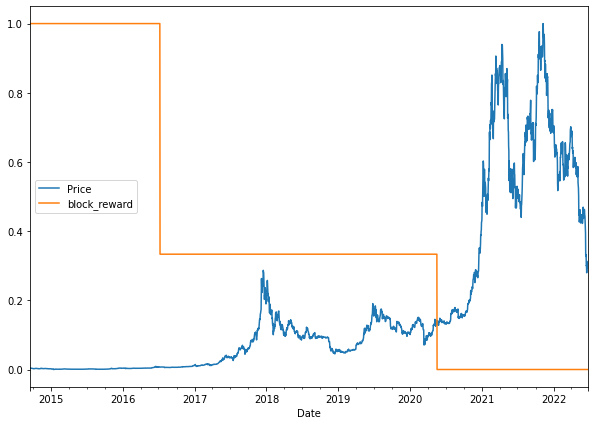

In [111]:
# Plot the block reward vs price over time
from sklearn.preprocessing import minmax_scale
scaled_price_block_df = pd.DataFrame(minmax_scale(bitcoin_prices_block[["Price", "block_reward"]]),
                                                                       columns=bitcoin_prices_block.columns,
                                                                       index=bitcoin_prices_block.index)
scaled_price_block_df.plot(figsize=(10, 7));

Previously, we've turned our univariate time series into windowed dataset using the helper functions above.

However, since we've got multivariate data, these functions won't work.

Not to worry, we can use the pandas.DataFrame.shift() method to window our multivariate data. https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.shift.html

In [112]:
# Setup dataset hyperparameters
HORIZON = 1
WINDOW_SIZE = 7

In [113]:
# Make a copy of the Bitcoin historical data with block reward feature
bitcoin_prices_windowed = bitcoin_prices_block.copy()

# Add windowed columns
for i in range(WINDOW_SIZE): # shift values for each step in WINDOW_SIZE
  bitcoin_prices_windowed[f"Price+{i+1}"] = bitcoin_prices_windowed["Price"].shift(periods=i+1)
bitcoin_prices_windowed.head(10)


,Price,block_reward,Price+1,Price+2,Price+3,Price+4,Price+5,Price+6,Price+7
Date,,,,,,,,,
2014-09-17,457.334015,25,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-09-18,424.440002,25,457.334015,NaN,NaN,NaN,NaN,NaN,NaN
2014-09-19,394.795990,25,424.440002,457.334015,NaN,NaN,NaN,NaN,NaN
2014-09-20,408.903992,25,394.795990,424.440002,457.334015,NaN,NaN,NaN,NaN
2014-09-21,398.821014,25,408.903992,394.795990,424.440002,457.334015,NaN,NaN,NaN
2014-09-22,402.152008,25,398.821014,408.903992,394.795990,424.440002,457.334015,NaN,NaN
2014-09-23,435.790985,25,402.152008,398.821014,408.903992,394.795990,424.440002,457.334015,NaN
2014-09-24,423.204987,25,435.790985,402.152008,398.821014,408.903992,394.795990,424.440002,457.334015
2014-09-25,411.574005,25,423.204987,435.790985,402.152008,398.821014,408.903992,394.795990,424.440002


In [114]:
bitcoin_prices_windowed.tail()

,Price,block_reward,Price+1,Price+2,Price+3,Price+4,Price+5,Price+6,Price+7
Date,,,,,,,,,
2022-06-21,20710.597656,6.25,20599.537109,20553.271484,19017.642578,20471.482422,20381.650391,22572.839844,22206.792969
2022-06-22,19987.029297,6.25,20710.597656,20599.537109,20553.271484,19017.642578,20471.482422,20381.650391,22572.839844
2022-06-23,21085.876953,6.25,19987.029297,20710.597656,20599.537109,20553.271484,19017.642578,20471.482422,20381.650391
2022-06-24,21231.656250,6.25,21085.876953,19987.029297,20710.597656,20599.537109,20553.271484,19017.642578,20471.482422
2022-06-25,21236.939453,6.25,21231.656250,21085.876953,19987.029297,20710.597656,20599.537109,20553.271484,19017.642578


In [115]:
# Create X (windows) and y (horizons) features
X = bitcoin_prices_windowed.dropna().drop("Price", axis=1).astype(np.float32)
y = bitcoin_prices_windowed.dropna()["Price"].astype(np.float32)
X.head()

,block_reward,Price+1,Price+2,Price+3,Price+4,Price+5,Price+6,Price+7
Date,,,,,,,,
2014-09-24,25.0,435.790985,402.152008,398.821014,408.903992,394.795990,424.440002,457.334015
2014-09-25,25.0,423.204987,435.790985,402.152008,398.821014,408.903992,394.795990,424.440002
2014-09-26,25.0,411.574005,423.204987,435.790985,402.152008,398.821014,408.903992,394.795990
2014-09-27,25.0,404.424988,411.574005,423.204987,435.790985,402.152008,398.821014,408.903992
2014-09-28,25.0,399.519989,404.424988,411.574005,423.204987,435.790985,402.152008,398.821014


In [116]:
y.head()

Date
2014-09-24    423.204987
2014-09-25    411.574005
2014-09-26    404.424988
2014-09-27    399.519989
2014-09-28    377.181000
Name: Price, dtype: float32

In [117]:
# Make train and test sets using indexing
split_size = int(len(X) * 0.8)
X_train, y_train = X[:split_size], y[:split_size]
X_test, y_test = X[split_size:], y[split_size:]
len(X_train), len(y_train), len(X_test), len(y_test)

(2265, 2265, 567, 567)

In [118]:

tf.random.set_seed(42)

# Make multivariate time series model
model_6 = tf.keras.Sequential([
  layers.Dense(128, activation="relu"),
  # layers.Dense(128, activation="relu"),
  layers.Dense(HORIZON)                          
], name="model_6_dense_multivariate")

# Compile
model_6.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam())

# Fit
model_6.fit(X_train, y_train,
            epochs=100,
            batch_size=128,
            verbose=1,
            validation_data=(X_test, y_test),
            callbacks=[create_model_checkpoint(model_name=model_6.name)])

Epoch 1/100
 1/18 [>.............................] - ETA: 4s - loss: 4223.5142INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


18/18 [==============================] - 1s 30ms/step - loss: 1863.6766 - val_loss: 4580.7100
Epoch 2/100
 1/18 [>.............................] - ETA: 0s - loss: 492.1706INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


18/18 [==============================] - 0s 25ms/step - loss: 414.6849 - val_loss: 2819.5447
Epoch 3/100
 1/18 [>.............................] - ETA: 0s - loss: 474.6079INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


18/18 [==============================] - 0s 25ms/step - loss: 290.5137 - val_loss: 2523.3289
Epoch 4/100
 1/18 [>.............................] - ETA: 0s - loss: 279.3248INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


18/18 [==============================] - 0s 24ms/step - loss: 275.4492 - val_loss: 2362.5110
Epoch 5/100
 1/18 [>.............................] - ETA: 0s - loss: 268.0697INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


18/18 [==============================] - 0s 24ms/step - loss: 258.9550 - val_loss: 2287.0364
Epoch 6/100
 1/18 [>.............................] - ETA: 0s - loss: 273.4567INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


18/18 [==============================] - 0s 25ms/step - loss: 252.0705 - val_loss: 2241.6777
Epoch 7/100
18/18 [==============================] - 0s 4ms/step - loss: 250.2823 - val_loss: 2299.2903
Epoch 8/100
 1/18 [>.............................] - ETA: 0s - loss: 239.3137INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


18/18 [==============================] - 0s 24ms/step - loss: 243.1176 - val_loss: 2157.0713
Epoch 9/100
 1/18 [>.............................] - ETA: 0s - loss: 281.1651INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


18/18 [==============================] - 0s 24ms/step - loss: 233.1068 - val_loss: 2059.9746
Epoch 10/100
 1/18 [>.............................] - ETA: 0s - loss: 163.0041INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


18/18 [==============================] - 0s 25ms/step - loss: 223.6796 - val_loss: 1993.2981
Epoch 11/100
 1/18 [>.............................] - ETA: 0s - loss: 203.3976INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


18/18 [==============================] - 1s 40ms/step - loss: 217.7661 - val_loss: 1927.1505
Epoch 12/100
 1/18 [>.............................] - ETA: 0s - loss: 212.6622INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


18/18 [==============================] - 0s 24ms/step - loss: 208.0526 - val_loss: 1871.6403
Epoch 13/100
18/18 [==============================] - 0s 4ms/step - loss: 201.7970 - val_loss: 1872.1766
Epoch 14/100
 1/18 [>.............................] - ETA: 0s - loss: 193.0550INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


18/18 [==============================] - 0s 24ms/step - loss: 197.2711 - val_loss: 1760.2738
Epoch 15/100
 1/18 [>.............................] - ETA: 0s - loss: 221.7039INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


18/18 [==============================] - 0s 24ms/step - loss: 194.3149 - val_loss: 1718.4655
Epoch 16/100
 1/18 [>.............................] - ETA: 0s - loss: 187.7694INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


18/18 [==============================] - 0s 25ms/step - loss: 187.2872 - val_loss: 1682.4642
Epoch 17/100
 1/18 [>.............................] - ETA: 0s - loss: 167.1939INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


18/18 [==============================] - 0s 23ms/step - loss: 179.8246 - val_loss: 1674.4562
Epoch 18/100
 1/18 [>.............................] - ETA: 0s - loss: 167.5792INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


18/18 [==============================] - 0s 24ms/step - loss: 177.1654 - val_loss: 1596.7606
Epoch 19/100
 1/18 [>.............................] - ETA: 0s - loss: 155.5727INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


18/18 [==============================] - 0s 24ms/step - loss: 171.9180 - val_loss: 1560.6729
Epoch 20/100
18/18 [==============================] - 0s 4ms/step - loss: 168.1480 - val_loss: 1606.8309
Epoch 21/100
 1/18 [>.............................] - ETA: 0s - loss: 187.6385INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


18/18 [==============================] - 0s 24ms/step - loss: 172.6658 - val_loss: 1494.6779
Epoch 22/100
18/18 [==============================] - 0s 4ms/step - loss: 169.3937 - val_loss: 1582.9191
Epoch 23/100
 1/18 [>.............................] - ETA: 0s - loss: 221.2138INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


18/18 [==============================] - 0s 25ms/step - loss: 159.6201 - val_loss: 1476.5588
Epoch 24/100
 1/18 [>.............................] - ETA: 0s - loss: 169.3021INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


18/18 [==============================] - 0s 24ms/step - loss: 157.1427 - val_loss: 1451.8912
Epoch 25/100
18/18 [==============================] - 0s 4ms/step - loss: 154.7983 - val_loss: 1463.7159
Epoch 26/100
18/18 [==============================] - 0s 3ms/step - loss: 156.1018 - val_loss: 1508.3755
Epoch 27/100
18/18 [==============================] - 0s 3ms/step - loss: 157.8162 - val_loss: 1454.4410
Epoch 28/100
 1/18 [>.............................] - ETA: 0s - loss: 135.0641INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


18/18 [==============================] - 0s 25ms/step - loss: 159.2921 - val_loss: 1393.1449
Epoch 29/100
18/18 [==============================] - 0s 4ms/step - loss: 158.9622 - val_loss: 1534.2748
Epoch 30/100
18/18 [==============================] - 0s 3ms/step - loss: 150.9337 - val_loss: 1410.2369
Epoch 31/100
18/18 [==============================] - 0s 3ms/step - loss: 150.4197 - val_loss: 1421.0223
Epoch 32/100
 1/18 [>.............................] - ETA: 0s - loss: 154.0126INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


18/18 [==============================] - 0s 23ms/step - loss: 149.0678 - val_loss: 1352.8456
Epoch 33/100
 1/18 [>.............................] - ETA: 0s - loss: 136.4281INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


18/18 [==============================] - 0s 25ms/step - loss: 154.6948 - val_loss: 1347.1987
Epoch 34/100
18/18 [==============================] - 0s 4ms/step - loss: 144.4324 - val_loss: 1350.9733
Epoch 35/100
18/18 [==============================] - 0s 4ms/step - loss: 145.4957 - val_loss: 1354.9878
Epoch 36/100
18/18 [==============================] - 0s 4ms/step - loss: 147.6949 - val_loss: 1437.6389
Epoch 37/100
18/18 [==============================] - 0s 3ms/step - loss: 162.1780 - val_loss: 1436.1755
Epoch 38/100
 1/18 [>.............................] - ETA: 0s - loss: 139.6023INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


18/18 [==============================] - 0s 25ms/step - loss: 145.7679 - val_loss: 1325.4448
Epoch 39/100
18/18 [==============================] - 0s 4ms/step - loss: 142.3979 - val_loss: 1331.4294
Epoch 40/100
 1/18 [>.............................] - ETA: 0s - loss: 131.0560INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


18/18 [==============================] - 0s 25ms/step - loss: 141.6680 - val_loss: 1314.0493
Epoch 41/100
18/18 [==============================] - 0s 4ms/step - loss: 144.5151 - val_loss: 1320.9565
Epoch 42/100
18/18 [==============================] - 0s 5ms/step - loss: 141.0314 - val_loss: 1344.3148
Epoch 43/100
 1/18 [>.............................] - ETA: 0s - loss: 184.8484INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


18/18 [==============================] - 0s 25ms/step - loss: 141.7621 - val_loss: 1303.4910
Epoch 44/100
18/18 [==============================] - 0s 4ms/step - loss: 139.7257 - val_loss: 1312.7690
Epoch 45/100
18/18 [==============================] - 0s 4ms/step - loss: 138.5567 - val_loss: 1323.7423
Epoch 46/100
18/18 [==============================] - 0s 3ms/step - loss: 146.3040 - val_loss: 1400.5659
Epoch 47/100
18/18 [==============================] - 0s 4ms/step - loss: 148.0358 - val_loss: 1585.9458
Epoch 48/100
 1/18 [>.............................] - ETA: 0s - loss: 160.2890INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


18/18 [==============================] - 0s 24ms/step - loss: 153.1118 - val_loss: 1288.2357
Epoch 49/100
18/18 [==============================] - 0s 4ms/step - loss: 138.2240 - val_loss: 1288.2491
Epoch 50/100
 1/18 [>.............................] - ETA: 0s - loss: 158.0298INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


18/18 [==============================] - 0s 24ms/step - loss: 138.3355 - val_loss: 1288.1285
Epoch 51/100
18/18 [==============================] - 0s 4ms/step - loss: 138.8591 - val_loss: 1294.4349
Epoch 52/100
 1/18 [>.............................] - ETA: 0s - loss: 180.1935INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


18/18 [==============================] - 0s 24ms/step - loss: 142.3236 - val_loss: 1285.3060
Epoch 53/100
18/18 [==============================] - 0s 4ms/step - loss: 139.5401 - val_loss: 1411.9623
Epoch 54/100
 1/18 [>.............................] - ETA: 0s - loss: 148.2525INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


18/18 [==============================] - 1s 39ms/step - loss: 138.5294 - val_loss: 1276.1693
Epoch 55/100
18/18 [==============================] - 0s 4ms/step - loss: 142.6200 - val_loss: 1332.6190
Epoch 56/100
 1/18 [>.............................] - ETA: 0s - loss: 185.2596INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


18/18 [==============================] - 0s 25ms/step - loss: 149.5144 - val_loss: 1274.8381
Epoch 57/100
18/18 [==============================] - 0s 4ms/step - loss: 136.7805 - val_loss: 1274.8706
Epoch 58/100
 1/18 [>.............................] - ETA: 0s - loss: 149.1095INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


18/18 [==============================] - 0s 25ms/step - loss: 138.6169 - val_loss: 1271.9924
Epoch 59/100
 1/18 [>.............................] - ETA: 0s - loss: 155.4229INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


18/18 [==============================] - 0s 24ms/step - loss: 136.1154 - val_loss: 1269.9458
Epoch 60/100
18/18 [==============================] - 0s 4ms/step - loss: 135.5397 - val_loss: 1294.4335
Epoch 61/100
18/18 [==============================] - 0s 3ms/step - loss: 136.7725 - val_loss: 1344.5403
Epoch 62/100
18/18 [==============================] - 0s 3ms/step - loss: 151.2357 - val_loss: 1691.7854
Epoch 63/100
18/18 [==============================] - 0s 4ms/step - loss: 150.5408 - val_loss: 1310.5940
Epoch 64/100
 1/18 [>.............................] - ETA: 0s - loss: 188.5418INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


18/18 [==============================] - 0s 25ms/step - loss: 142.8468 - val_loss: 1268.8568
Epoch 65/100
18/18 [==============================] - 0s 4ms/step - loss: 142.2562 - val_loss: 1449.9233
Epoch 66/100
18/18 [==============================] - 0s 4ms/step - loss: 146.5261 - val_loss: 1276.3260
Epoch 67/100
 1/18 [>.............................] - ETA: 0s - loss: 127.1660INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


18/18 [==============================] - 0s 25ms/step - loss: 136.9064 - val_loss: 1265.7034
Epoch 68/100
 1/18 [>.............................] - ETA: 0s - loss: 134.1550INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


18/18 [==============================] - 0s 24ms/step - loss: 135.5850 - val_loss: 1263.7471
Epoch 69/100
18/18 [==============================] - 0s 4ms/step - loss: 134.4024 - val_loss: 1288.7245
Epoch 70/100
18/18 [==============================] - 0s 4ms/step - loss: 145.1089 - val_loss: 1388.2189
Epoch 71/100
18/18 [==============================] - 0s 3ms/step - loss: 140.0398 - val_loss: 1264.2178
Epoch 72/100
 1/18 [>.............................] - ETA: 0s - loss: 159.0779INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


18/18 [==============================] - 0s 26ms/step - loss: 138.0761 - val_loss: 1262.8779
Epoch 73/100
18/18 [==============================] - 0s 4ms/step - loss: 137.2853 - val_loss: 1274.8361
Epoch 74/100
 1/18 [>.............................] - ETA: 0s - loss: 164.7969INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


18/18 [==============================] - 0s 24ms/step - loss: 137.5963 - val_loss: 1262.0881
Epoch 75/100
18/18 [==============================] - 0s 4ms/step - loss: 135.3841 - val_loss: 1263.2363
Epoch 76/100
18/18 [==============================] - 0s 4ms/step - loss: 136.7962 - val_loss: 1306.4128
Epoch 77/100
18/18 [==============================] - 0s 5ms/step - loss: 138.3039 - val_loss: 1325.4611
Epoch 78/100
18/18 [==============================] - 0s 3ms/step - loss: 137.2643 - val_loss: 1306.5708
Epoch 79/100
 1/18 [>.............................] - ETA: 0s - loss: 111.6661INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


18/18 [==============================] - 0s 25ms/step - loss: 134.8657 - val_loss: 1261.0488
Epoch 80/100
 1/18 [>.............................] - ETA: 0s - loss: 126.7921INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


18/18 [==============================] - 0s 24ms/step - loss: 136.1300 - val_loss: 1259.9858
Epoch 81/100
18/18 [==============================] - 0s 4ms/step - loss: 137.4932 - val_loss: 1303.5192
Epoch 82/100
18/18 [==============================] - 0s 4ms/step - loss: 135.9482 - val_loss: 1274.0972
Epoch 83/100
18/18 [==============================] - 0s 3ms/step - loss: 140.4702 - val_loss: 1433.2101
Epoch 84/100
18/18 [==============================] - 0s 4ms/step - loss: 149.8181 - val_loss: 1547.6490
Epoch 85/100
18/18 [==============================] - 0s 3ms/step - loss: 152.4735 - val_loss: 1315.0442
Epoch 86/100
18/18 [==============================] - 0s 3ms/step - loss: 140.5009 - val_loss: 1323.5085
Epoch 87/100
 1/18 [>.............................] - ETA: 0s - loss: 216.4279INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


18/18 [==============================] - 0s 24ms/step - loss: 139.0274 - val_loss: 1256.3086
Epoch 88/100
18/18 [==============================] - 0s 4ms/step - loss: 137.7757 - val_loss: 1299.6984
Epoch 89/100
18/18 [==============================] - 0s 4ms/step - loss: 140.6833 - val_loss: 1264.7577
Epoch 90/100
18/18 [==============================] - 0s 4ms/step - loss: 151.7269 - val_loss: 1420.0493
Epoch 91/100
18/18 [==============================] - 0s 4ms/step - loss: 141.8350 - val_loss: 1316.3867
Epoch 92/100
18/18 [==============================] - 0s 4ms/step - loss: 136.6861 - val_loss: 1326.0791
Epoch 93/100
18/18 [==============================] - 0s 4ms/step - loss: 135.3830 - val_loss: 1258.7036
Epoch 94/100
18/18 [==============================] - 0s 3ms/step - loss: 135.6380 - val_loss: 1273.2635
Epoch 95/100
18/18 [==============================] - 0s 3ms/step - loss: 147.6941 - val_loss: 1298.3689
Epoch 96/100
18/18 [==============================] - 0s 4ms/step -

INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


18/18 [==============================] - 0s 25ms/step - loss: 141.2703 - val_loss: 1256.0170
Epoch 100/100
18/18 [==============================] - 0s 4ms/step - loss: 135.6673 - val_loss: 1264.0972


In [119]:
# Evaluate multivariate model
model_6.evaluate(X_test, y_test)

18/18 [==============================] - 0s 2ms/step - loss: 1264.0972


1264.09716796875

In [120]:
# Load in and evaluate best performing model
model_6 = tf.keras.models.load_model("model_experiments/model_6_dense_multivariate")
model_6.evaluate(X_test, y_test)

18/18 [==============================] - 0s 2ms/step - loss: 1256.0170


1256.0169677734375

In [121]:
# Make predictions with multivariate model
model_6_preds = tf.squeeze(model_6.predict(X_test))
model_6_preds[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([19054.354, 19408.848, 19211.012, 18448.607, 18564.139, 18329.969,
       18050.986, 18710.346, 19163.416, 19246.613], dtype=float32)>

In [122]:
# Evaluate predictions to get eval metrics
model_6_results = evaluate_preds(y_true=y_test,
                                 y_pred=model_6_preds)
model_6_results

{'mae': 1256.0168,
 'mape': 2.994011,
 'mase': 1.0087428,
 'mse': 2967613.8,
 'rmse': 1722.6763}

In [123]:
model_1_results

{'mae': 1256.6902,
 'mape': 2.9990795,
 'mase': 1.0092837,
 'mse': 2986000.2,
 'rmse': 1728.0046}

##Model 7: N-BEATS algorithm

We're going to be replicating the algorithm in Figure 1 from the following paper: https://arxiv.org/pdf/1905.10437.pdf

To create custom layers and models in TensorFlow we can use subclassing: https://www.tensorflow.org/guide/keras/custom_layers_and_models

In [124]:
# Create NBeatBlock custom layer
class NBeatsBlock(tf.keras.layers.Layer):
  def __init__(self, 
               input_size: int,
               theta_size: int,
               horizon: int,
               n_neurons: int,
               n_layers: int,
               **kwargs): # the **kwargs argument takes care of all the arguments for the parent class (input_shape, trainable, name)
    super().__init__(**kwargs)
    self.input_size = input_size
    self.theta_size = theta_size
    self.horizon = horizon
    self.n_neurons = n_neurons
    self.n_layers = n_layers

    # Block contains stack of 4 fully connected layers each has ReLU activation
    self.hidden = [tf.keras.layers.Dense(n_neurons, activation="relu") for _ in range(n_layers)]
    # Output of block is a theta layer with linear activation
    self.theta_layer = tf.keras.layers.Dense(theta_size, activation="linear", name="theta")

  def call(self, inputs):
    x = inputs
    for layer in self.hidden:
      x = layer(x)
    theta = self.theta_layer(x)
    # Output the backcast and the forecast from theta
    backcast, forecast = theta[:, :self.input_size], theta[:, -self.horizon:]
    return backcast, forecast

In [125]:
# Set up dummy NBeatsBlock layer to represent inputs and outputs
tf.random.set_seed(42)
dummy_nbeats_block_layer = NBeatsBlock(input_size=WINDOW_SIZE,
                                       theta_size=WINDOW_SIZE+HORIZON, # backcast + forecast
                                       horizon=HORIZON,
                                       n_neurons=128,
                                       n_layers=4)

In [126]:
# Create dummy inputs (have to be same size as input_size)
dummy_inputs = tf.expand_dims(tf.range(WINDOW_SIZE) + 1, axis=0) # input shape to the model has to reflect dense layer input requirements (ndim=2)
dummy_inputs

<tf.Tensor: shape=(1, 7), dtype=int32, numpy=array([[1, 2, 3, 4, 5, 6, 7]], dtype=int32)>

In [127]:
# Pass dummy inputs to dummy NBeatsBlock layer
backcast, forecast = dummy_nbeats_block_layer(dummy_inputs)
# These are the activation outputs of the theta layer (they'll be random due to no training of the model)
print(f"Backcast: {tf.squeeze(backcast.numpy())}")
print(f"Forecast: {tf.squeeze(forecast.numpy())}")

Backcast: [ 0.07960171  0.32512033 -0.8428683  -0.6938985  -0.31720552 -0.5698734
 -0.6396662 ]
Forecast: 1.0071648359298706


We will be following the performance data pipeline in the tensorflow guide: https://www.tensorflow.org/guide/data_performance

In [128]:
HORIZON = 1
WINDOW_SIZE = 7

In [129]:
# Create N-BEATS data inputs (N-BEATS works with univariate time series)
bitcoin_prices.head()

,Price
Date,
2014-09-17,457.334015
2014-09-18,424.440002
2014-09-19,394.795990
2014-09-20,408.903992
2014-09-21,398.821014


In [130]:
# Add windowed columns
bitcoin_prices_nbeats = bitcoin_prices.copy()
for i in range(WINDOW_SIZE):
  bitcoin_prices_nbeats[f"Price+{i+1}"] = bitcoin_prices_nbeats["Price"].shift(periods=i+1)
bitcoin_prices_nbeats.head()

,Price,Price+1,Price+2,Price+3,Price+4,Price+5,Price+6,Price+7
Date,,,,,,,,
2014-09-17,457.334015,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-09-18,424.440002,457.334015,NaN,NaN,NaN,NaN,NaN,NaN
2014-09-19,394.795990,424.440002,457.334015,NaN,NaN,NaN,NaN,NaN
2014-09-20,408.903992,394.795990,424.440002,457.334015,NaN,NaN,NaN,NaN
2014-09-21,398.821014,408.903992,394.795990,424.440002,457.334015,NaN,NaN,NaN


In [131]:
# Make features and labels
X = bitcoin_prices_nbeats.dropna().drop("Price", axis=1)
y = bitcoin_prices_nbeats.dropna()["Price"]

# Make train and test sets
split_size = int(len(X) * 0.8)
X_train, y_train = X[:split_size], y[:split_size]
X_test, y_test = X[split_size:], y[split_size:]
len(X_train), len(y_train), len(X_test), len(y_test)

(2265, 2265, 567, 567)

In [132]:
# Time to make our dataset performant using tf.data API
train_features_dataset = tf.data.Dataset.from_tensor_slices(X_train)
train_labels_dataset = tf.data.Dataset.from_tensor_slices(y_train)

test_features_dataset = tf.data.Dataset.from_tensor_slices(X_test)
test_labels_dataset = tf.data.Dataset.from_tensor_slices(y_test)

# Combine labels and features by zipping together -> (features, labels)
train_dataset = tf.data.Dataset.zip((train_features_dataset, train_labels_dataset))
test_dataset = tf.data.Dataset.zip((test_features_dataset, test_labels_dataset))

# Batch and prefetch
BATCH_SIZE = 1024
train_dataset = train_dataset.batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)
test_dataset = test_dataset.batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)

train_dataset, test_dataset

(<PrefetchDataset element_spec=(TensorSpec(shape=(None, 7), dtype=tf.float64, name=None), TensorSpec(shape=(None,), dtype=tf.float64, name=None))>,
 <PrefetchDataset element_spec=(TensorSpec(shape=(None, 7), dtype=tf.float64, name=None), TensorSpec(shape=(None,), dtype=tf.float64, name=None))>)

In [133]:
# Values from N-BEATS paper: https://arxiv.org/pdf/1905.10437.pdf
N_EPOCHS = 5000
N_NEURONS = 512
N_LAYERS = 4 
N_STACKS = 30 

INPUT_SIZE = WINDOW_SIZE * HORIZON
THETA_SIZE = INPUT_SIZE + HORIZON

INPUT_SIZE, THETA_SIZE

(7, 8)

In [134]:
# Make tensors
tensor_1 = tf.range(10) + 10
tensor_2 = tf.range(10)

# Subtract
subtracted = layers.subtract([tensor_1, tensor_2])

# Add
added = layers.add([tensor_1, tensor_2])

# Get outputs
print(f"Input tensors: {tensor_1.numpy()} & {tensor_2.numpy()}")
print(f"Subtracted: {subtracted.numpy()}")
print(f"Added: {added.numpy()}")

Input tensors: [10 11 12 13 14 15 16 17 18 19] & [0 1 2 3 4 5 6 7 8 9]
Subtracted: [10 10 10 10 10 10 10 10 10 10]
Added: [10 12 14 16 18 20 22 24 26 28]


In [135]:
%%time

tf.random.set_seed(42)

# 1. Setup and instance of NBeatsBlock
nbeats_block_layer = NBeatsBlock(input_size=INPUT_SIZE, 
                                 theta_size=THETA_SIZE,
                                 horizon=HORIZON,
                                 n_neurons=N_NEURONS,
                                 n_layers=N_LAYERS,
                                 name="InitialBlock")

# 2. Create input to stack
stack_input = layers.Input(shape=(INPUT_SIZE), name="stack_input")

# 3. Create initial backcast and forecast input (backwards prediction + horizon prediction)
residuals, forecast = nbeats_block_layer(stack_input)

# 4. Create stacks of block layers
for i, _ in enumerate(range(N_STACKS-1)): # first stack is already created in (3)

  # 5. Use the NBeatsBlock to calculate the backcast as well as the forecast
  backcast, block_forecast = NBeatsBlock(
      input_size=INPUT_SIZE,
      theta_size=THETA_SIZE,
      horizon=HORIZON,
      n_neurons=N_NEURONS,
      n_layers=N_LAYERS,
      name=f"NBeatsBlock_{i}"
  )(residuals) # pass in the residuals

  # 6. Create the double residual stacking
  residuals = layers.subtract([residuals, backcast], name=f"subtract_{i}")
  forecast = layers.add([forecast, block_forecast], name=f"add_{i}")

# 7. Put the stack model together
model_7 = tf.keras.Model(inputs=stack_input, outputs=forecast, name="model_7_NBEATS")

# 8. Compile model with MAE loss
model_7.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam())

# 9. Fit the model with EarlyStopping and ReduceLROnPlateau callbacks
model_7.fit(train_dataset,
            epochs=N_EPOCHS,
            validation_data=test_dataset,
            verbose=0,
            callbacks=[tf.keras.callbacks.EarlyStopping(monitor="val_loss",
                                                        patience=200,
                                                        restore_best_weights=True),
                       tf.keras.callbacks.ReduceLROnPlateau(monitor="val_loss",
                                                            patience=100,
                                                            verbose=1)])


Epoch 1035: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.

Epoch 1135: ReduceLROnPlateau reducing learning rate to 1.0000000474974514e-05.
CPU times: user 3min 17s, sys: 5.3 s, total: 3min 22s
Wall time: 3min 55s


In [136]:
# Evaluate N-BEats model on the test dataset
model_7.evaluate(test_dataset)

1/1 [==============================] - 0s 20ms/step - loss: 1306.4092


1306.4091796875

In [137]:
# Make predictions with N-BEATS model
model_7_preds = make_preds(model_7, test_dataset)
model_7_preds[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([19040.898, 19303.55 , 19282.156, 18610.977, 18585.357, 18375.729,
       18221.72 , 18623.477, 19041.83 , 19196.82 ], dtype=float32)>

In [138]:
# Evaluate N-BEATS model preds
model_7_results = evaluate_preds(y_true=y_test,
                                 y_pred=model_7_preds)
model_7_results

{'mae': 1306.4092,
 'mape': 3.123023,
 'mase': 1.0492144,
 'mse': 3147085.5,
 'rmse': 1774.0027}

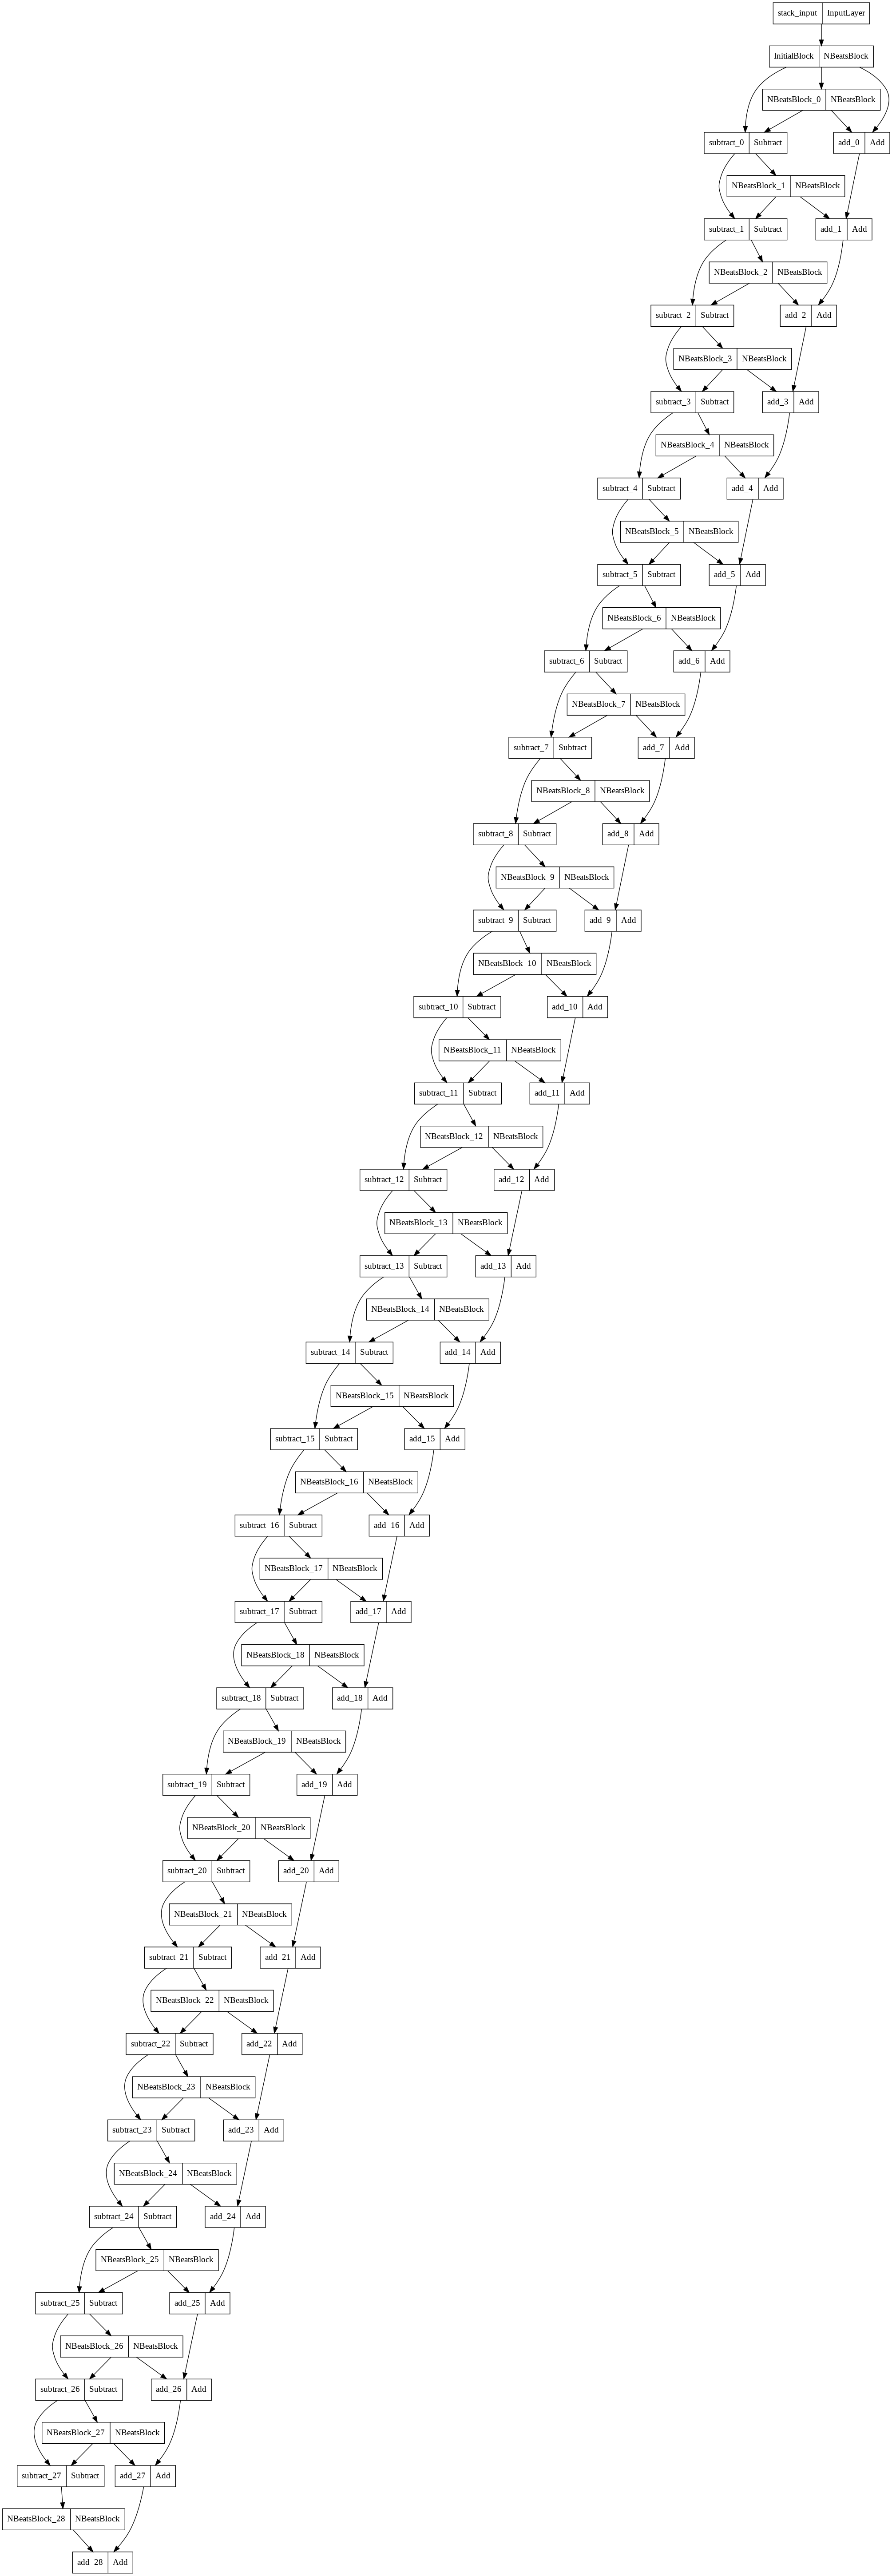

In [139]:
# Plot the N-BEATS model and inspect the architecture
from tensorflow.keras.utils import plot_model
plot_model(model_7)

## Model 8: Creating an ensemble (stacking different models together)

In [140]:
HORIZON, WINDOW_SIZE

(1, 7)

In [141]:
def get_ensemble_models(horizon=HORIZON,
                        train_data=train_dataset,
                        test_data=test_dataset,
                        num_iter=10,
                        num_epochs=1000,
                        loss_fns=["mae", "mse", "mape"]):
  """
  Returns a list of num_iter models each trained on MAE, MSE and MAPE loss.

  For example, if num_iter=10, a list of 30 trained models will be returned: 
  10 * len(["mae", "mse", "mape"]).
  """
  # Make empty list for trained ensemble models
  ensemble_models = []

  # Create num_iter number of models per loss function
  for i in range(num_iter):
    # Build and fit a new model with a different loss function
    for loss_function in loss_fns:
      print(f"Optimizing model by reducing: {loss_function} for {num_epochs} epochs, model number: {i}")

      # Construct a simple model (similar to model_1)
      model = tf.keras.Sequential([
        # Initialize dense layers with normal distribution for estimating prediction intervals later on
        layers.Dense(128, kernel_initializer="he_normal", activation="relu"),
        layers.Dense(128, kernel_initializer="he_normal", activation="relu"),
        layers.Dense(HORIZON)
      ])

      # Compile simple model with current loss function
      model.compile(loss=loss_function,
                    optimizer=tf.keras.optimizers.Adam(),
                    metrics=["mae", "mse"])
      
      # Fit the current model
      model.fit(train_data,
                epochs=num_epochs,
                verbose=0,
                validation_data=test_data,
                callbacks=[tf.keras.callbacks.EarlyStopping(monitor="val_loss",
                                                            patience=200,
                                                            restore_best_weights=True),
                           tf.keras.callbacks.ReduceLROnPlateau(monitor="val_loss",
                                                                patience=100,
                                                                verbose=1)])
      # Append fitted model to list of ensemble models
      ensemble_models.append(model)

  return ensemble_models

In [142]:
%%time
# Get list of trained ensemble models
ensemble_models = get_ensemble_models(num_iter=5,
                                      num_epochs=1000)

Optimizing model by reducing: mae for 1000 epochs, model number: 0
Optimizing model by reducing: mse for 1000 epochs, model number: 0

Epoch 525: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.

Epoch 634: ReduceLROnPlateau reducing learning rate to 1.0000000474974514e-05.

Epoch 734: ReduceLROnPlateau reducing learning rate to 1.0000000656873453e-06.
Optimizing model by reducing: mape for 1000 epochs, model number: 0

Epoch 209: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.

Epoch 733: ReduceLROnPlateau reducing learning rate to 1.0000000474974514e-05.

Epoch 833: ReduceLROnPlateau reducing learning rate to 1.0000000656873453e-06.
Optimizing model by reducing: mae for 1000 epochs, model number: 1
Optimizing model by reducing: mse for 1000 epochs, model number: 1

Epoch 313: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.

Epoch 413: ReduceLROnPlateau reducing learning rate to 1.0000000474974514e-05.
Optimizing model by redu

In [143]:
ensemble_models

In [144]:
# Create a function which uses a list of trained models to make and return a list of predictions
def make_ensemble_preds(ensemble_models, data):
  ensemble_preds = []
  for model in ensemble_models:
    preds = model.predict(data)
    ensemble_preds.append(preds)
  return tf.constant(tf.squeeze(ensemble_preds))


In [145]:
# Create a list of ensemble predictions
%%time
ensemble_preds = make_ensemble_preds(ensemble_models=ensemble_models,
                                     data=test_dataset)
ensemble_preds

CPU times: user 603 ms, sys: 23 ms, total: 626 ms
Wall time: 606 ms


In [146]:
ensemble_preds

<tf.Tensor: shape=(15, 567), dtype=float32, numpy=
array([[19269.912, 19390.748, 19304.045, ..., 20058.686, 21188.648,
        21282.008],
       [18897.969, 19455.986, 19225.22 , ..., 19650.041, 21408.133,
        21103.518],
       [19143.36 , 19340.803, 19274.889, ..., 19914.525, 20918.627,
        21380.557],
       ...,
       [18988.477, 19378.363, 19184.41 , ..., 20204.16 , 20540.416,
        21153.252],
       [18985.465, 19317.365, 19262.494, ..., 19803.557, 21213.871,
        21060.13 ],
       [19136.879, 19301.025, 19260.686, ..., 20010.824, 21135.34 ,
        21233.982]], dtype=float32)>

In [147]:
ensemble_mean = tf.reduce_mean(ensemble_preds, axis=0)
ensemble_mean[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([19034.92 , 19293.129, 19199.25 , 18268.678, 18497.799, 18236.629,
       18091.799, 18673.469, 19108.137, 19198.213], dtype=float32)>

In [148]:
ensemble_median = np.median(ensemble_preds, axis=0)
ensemble_median[:10]

array([19136.879, 19333.182, 19243.33 , 18321.393, 18531.244, 18259.309,
       18133.652, 18719.707, 19162.541, 19281.205], dtype=float32)

In [149]:
# Evaluate ensemble model predictions
ensemble_results = evaluate_preds(y_true=y_test,
                                  y_pred=ensemble_mean)
ensemble_results

{'mae': 1253.0006,
 'mape': 2.9896832,
 'mase': 1.0063205,
 'mse': 2957725.0,
 'rmse': 1719.8037}

In [150]:
# Evaluate ensemble model predictions
ensemble_results = evaluate_preds(y_true=y_test,
                                  y_pred=ensemble_median)
ensemble_results

{'mae': 1247.8367,
 'mape': 2.981095,
 'mase': 1.0021731,
 'mse': 2962077.8,
 'rmse': 1721.0687}

In [151]:
model_1_results

{'mae': 1256.6902,
 'mape': 2.9990795,
 'mase': 1.0092837,
 'mse': 2986000.2,
 'rmse': 1728.0046}

**Plotting the prediction intervals (uncertainty estimates) of our ensemble**

There are two major types of uncertainty in machine learning you should know about:

**Aleatoric uncertainty** - this type of uncertainty cannot be reduced and it is often referred as "data" uncertainty or "subway" uncertainty

**Epistemic uncertainty** - this type of uncertainty can be reduced, it also referred to as "model" or "coconut" uncertainty

In [152]:
# Find upper and lower bounds of ensemble predictions
def get_upper_lower(preds): # 1. Take the predictions from a number of randomly intialized models

  # 2. Measure the standard deviation of the predictions
  std = tf.math.reduce_std(preds, axis=0)

  # 3. Multiply the standard deviation by 1.96
  interval = 1.96 * std

  # 4. Get the prediction interval upper and lower bounds 
  preds_mean = tf.reduce_mean(preds, axis=0)
  lower, upper = preds_mean - interval, preds_mean + interval

  return lower, upper

In [153]:
# Get the upper and lower bounds of the 95% percent prediction interval
lower, upper = get_upper_lower(preds=ensemble_preds)

In [154]:
X_test.index[:10]

DatetimeIndex(['2020-12-06', '2020-12-07', '2020-12-08', '2020-12-09',
               '2020-12-10', '2020-12-11', '2020-12-12', '2020-12-13',
               '2020-12-14', '2020-12-15'],
              dtype='datetime64[ns]', name='Date', freq=None)

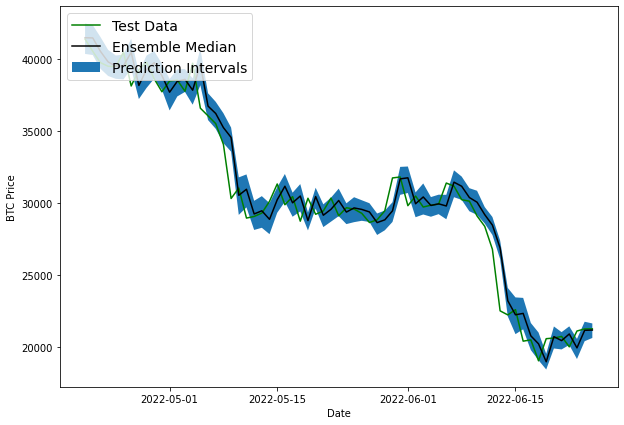

In [155]:
# Get the median/mean values of our ensemble preds
ensemble_median = np.median(ensemble_preds, axis=0)

# Plot the median of our ensemble preds along with the prediction intervals (where the predictions fall between)
offset=500
plt.figure(figsize=(10, 7))
plt.plot(X_test.index[offset:], y_test[offset:], "g", label="Test Data")
plt.plot(X_test.index[offset:], ensemble_median[offset:], "k-", label="Ensemble Median")
plt.xlabel("Date")
plt.ylabel("BTC Price")
# To plot the upper and lower bounds, let's use fill_between: https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.fill_between.html
plt.fill_between(X_test.index[offset:],
                 (lower)[offset:],
                 (upper)[offset:], label="Prediction Intervals")
plt.legend(loc="upper left", fontsize=14);

##Model 9: Train a model on the full historical data to make predictions into the future

So far all of our models have predicted on the test dataset, however, this is only a pseudofuture. Let's now build a model which is capable of predicting into the future!

In [156]:
HORIZON = 1
WINDOW_SIZE = 7

In [157]:
bitcoin_prices_windowed.head()

,Price,block_reward,Price+1,Price+2,Price+3,Price+4,Price+5,Price+6,Price+7
Date,,,,,,,,,
2014-09-17,457.334015,25,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-09-18,424.440002,25,457.334015,NaN,NaN,NaN,NaN,NaN,NaN
2014-09-19,394.795990,25,424.440002,457.334015,NaN,NaN,NaN,NaN,NaN
2014-09-20,408.903992,25,394.795990,424.440002,457.334015,NaN,NaN,NaN,NaN
2014-09-21,398.821014,25,408.903992,394.795990,424.440002,457.334015,NaN,NaN,NaN


In [158]:
bitcoin_prices_windowed.tail()

,Price,block_reward,Price+1,Price+2,Price+3,Price+4,Price+5,Price+6,Price+7
Date,,,,,,,,,
2022-06-21,20710.597656,6.25,20599.537109,20553.271484,19017.642578,20471.482422,20381.650391,22572.839844,22206.792969
2022-06-22,19987.029297,6.25,20710.597656,20599.537109,20553.271484,19017.642578,20471.482422,20381.650391,22572.839844
2022-06-23,21085.876953,6.25,19987.029297,20710.597656,20599.537109,20553.271484,19017.642578,20471.482422,20381.650391
2022-06-24,21231.656250,6.25,21085.876953,19987.029297,20710.597656,20599.537109,20553.271484,19017.642578,20471.482422
2022-06-25,21236.939453,6.25,21231.656250,21085.876953,19987.029297,20710.597656,20599.537109,20553.271484,19017.642578


In [159]:
# Train model on entire data to make predictions for the next day
X_all = bitcoin_prices_windowed.dropna().drop(["Price", "block_reward"], axis=1).to_numpy()
# Get labels
y_all = bitcoin_prices_windowed.dropna()["Price"].to_numpy()

len(X_all), len(y_all)

(2832, 2832)

In [160]:
X_all[:5], y_all[:5]

(array([[435.790985, 402.152008, 398.821014, 408.903992, 394.79599 ,
         424.440002, 457.334015],
        [423.204987, 435.790985, 402.152008, 398.821014, 408.903992,
         394.79599 , 424.440002],
        [411.574005, 423.204987, 435.790985, 402.152008, 398.821014,
         408.903992, 394.79599 ],
        [404.424988, 411.574005, 423.204987, 435.790985, 402.152008,
         398.821014, 408.903992],
        [399.519989, 404.424988, 411.574005, 423.204987, 435.790985,
         402.152008, 398.821014]]),
 array([423.204987, 411.574005, 404.424988, 399.519989, 377.181   ]))

In [161]:
# Turn data into efficient running tensors

features_dataset_all = tf.data.Dataset.from_tensor_slices(X_all)
labels_dataset_all = tf.data.Dataset.from_tensor_slices(y_all)

# Combine features and labels
dataset_all = tf.data.Dataset.zip((features_dataset_all, labels_dataset_all))

# Batch and prefetch for optimial performance
BATCH_SIZE = 1024
dataset_all = dataset_all.batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)

dataset_all

<PrefetchDataset element_spec=(TensorSpec(shape=(None, 7), dtype=tf.float64, name=None), TensorSpec(shape=(None,), dtype=tf.float64, name=None))>

In [162]:
tf.random.set_seed(42)

# Create model (nice and simple, just to test)
model_9 = tf.keras.Sequential([
  layers.Dense(128, activation="relu"),
  layers.Dense(128, activation="relu"),
  layers.Dense(HORIZON)
], name="model_9_future_model")

# Compile
model_9.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.Adam())

# Fit model on all of the data to make future forecasts
model_9.fit(dataset_all,
            epochs=100,
            verbose=0)

**Make predictions into future**

In [190]:
# How many timestesp to predict into the future?
INTO_FUTURE = 30

In [191]:
# 1. Create function to make predictions into the future
def make_future_forecasts(values, model, into_future, window_size=WINDOW_SIZE) -> list:
  """
  Make future forecasts into_future steps after values ends.

  Returns future forecasts as a list of floats.
  """
  # 2. Create an empty list for future forecasts/prepare data to forecast on
  future_forecast = []
  last_window = values[-WINDOW_SIZE:]

  # 3. Make INTO_FUTURE numer of predictions, altering the data which gets predicted on each
  for _ in range(INTO_FUTURE):
    # Predict on the last window then append it again, again, again (our model will eventually start to make forecasts on its own forecasts)
    future_pred = model.predict(tf.expand_dims(last_window, axis=0))
    print(f"Predicting on:\n {last_window} -> Prediction: {tf.squeeze(future_pred).numpy()}\n")

    # Append predictions to future_forecast
    future_forecast.append(tf.squeeze(future_pred).numpy())

    # Update last window with new pred and get WINDOW_SIZE most recent preds (model was trained on WINDOW_SIZE windows)
    last_window = np.append(last_window, future_pred)[-WINDOW_SIZE:]
  
  return future_forecast

In [192]:
# Make forecasts into the future
future_forecast = make_future_forecasts(values=y_all,
                                        model=model_9,
                                        into_future=INTO_FUTURE,
                                        window_size=WINDOW_SIZE)

Predicting on:
 [20553.271484 20599.537109 20710.597656 19987.029297 21085.876953
 21231.65625  21236.939453] -> Prediction: 20409.3515625

Predicting on:
 [20599.537109  20710.597656  19987.029297  21085.876953  21231.65625
 21236.939453  20409.3515625] -> Prediction: 20533.533203125

Predicting on:
 [20710.597656   19987.029297   21085.876953   21231.65625
 21236.939453   20409.3515625  20533.53320312] -> Prediction: 20498.751953125

Predicting on:
 [19987.029297   21085.876953   21231.65625    21236.939453
 20409.3515625  20533.53320312 20498.75195312] -> Prediction: 20479.787109375

Predicting on:
 [21085.876953   21231.65625    21236.939453   20409.3515625
 20533.53320312 20498.75195312 20479.78710938] -> Prediction: 21105.669921875

Predicting on:
 [21231.65625    21236.939453   20409.3515625  20533.53320312
 20498.75195312 20479.78710938 21105.66992188] -> Prediction: 21054.591796875

Predicting on:
 [21236.939453   20409.3515625  20533.53320312 20498.75195312
 20479.78710938 21

In [193]:
future_forecast

[20409.352,
 20533.533,
 20498.752,
 20479.787,
 21105.67,
 21054.592,
 20825.271,
 20348.639,
 20499.97,
 20538.637,
 20722.865,
 20989.785,
 20820.268,
 20564.447,
 20352.164,
 20520.873,
 20617.357,
 20774.81,
 20812.06,
 20612.193,
 20431.102,
 20391.613,
 20555.586,
 20646.525,
 20709.865,
 20631.445,
 20466.73,
 20382.87,
 20435.342,
 20566.057]

In [194]:
def get_future_dates(start_date, into_future, offset=1):
  """
  Returns array of datetime values ranging from start_date to start_date+into_future
  """
  start_date = start_date + np.timedelta64(offset, "D") # specify start date, "D" stands for day
  end_date = start_date + np.timedelta64(into_future, "D") # specify end date
  return np.arange(start_date, end_date, dtype="datetime64[D]") # return a date range between start and end date

In [195]:
# Last timestep of timesteps (currently np.datetime64 format)
last_timestep = bitcoin_prices.index[-1]
last_timestep

Timestamp('2022-06-25 00:00:00')

In [196]:
# Get next two week of timesteps
next_time_steps = get_future_dates(start_date=last_timestep,
                                   into_future=INTO_FUTURE)
next_time_steps

array(['2022-06-26', '2022-06-27', '2022-06-28', '2022-06-29',
       '2022-06-30', '2022-07-01', '2022-07-02', '2022-07-03',
       '2022-07-04', '2022-07-05', '2022-07-06', '2022-07-07',
       '2022-07-08', '2022-07-09', '2022-07-10', '2022-07-11',
       '2022-07-12', '2022-07-13', '2022-07-14', '2022-07-15',
       '2022-07-16', '2022-07-17', '2022-07-18', '2022-07-19',
       '2022-07-20', '2022-07-21', '2022-07-22', '2022-07-23',
       '2022-07-24', '2022-07-25'], dtype='datetime64[D]')

In [197]:
bitcoin_prices.index

DatetimeIndex(['2014-09-17', '2014-09-18', '2014-09-19', '2014-09-20',
               '2014-09-21', '2014-09-22', '2014-09-23', '2014-09-24',
               '2014-09-25', '2014-09-26',
               ...
               '2022-06-16', '2022-06-17', '2022-06-18', '2022-06-19',
               '2022-06-20', '2022-06-21', '2022-06-22', '2022-06-23',
               '2022-06-24', '2022-06-25'],
              dtype='datetime64[ns]', name='Date', length=2839, freq=None)

In [198]:
# Insert last timestep/final price into next time steps and future forecasts so the plot doesn't look janky
next_time_steps = np.insert(next_time_steps, 0, last_timestep)
future_forecast = np.insert(future_forecast, 0, btc_price[-1])
next_time_steps, future_forecast

(array(['2022-06-25', '2022-06-26', '2022-06-27', '2022-06-28',
        '2022-06-29', '2022-06-30', '2022-07-01', '2022-07-02',
        '2022-07-03', '2022-07-04', '2022-07-05', '2022-07-06',
        '2022-07-07', '2022-07-08', '2022-07-09', '2022-07-10',
        '2022-07-11', '2022-07-12', '2022-07-13', '2022-07-14',
        '2022-07-15', '2022-07-16', '2022-07-17', '2022-07-18',
        '2022-07-19', '2022-07-20', '2022-07-21', '2022-07-22',
        '2022-07-23', '2022-07-24', '2022-07-25'], dtype='datetime64[D]'),
 array([21236.94 , 20409.352, 20533.533, 20498.752, 20479.787, 21105.67 ,
        21054.592, 20825.271, 20348.639, 20499.97 , 20538.637, 20722.865,
        20989.785, 20820.268, 20564.447, 20352.164, 20520.873, 20617.357,
        20774.81 , 20812.06 , 20612.193, 20431.102, 20391.613, 20555.586,
        20646.525, 20709.865, 20631.445, 20466.73 , 20382.87 , 20435.342,
        20566.057], dtype=float32))

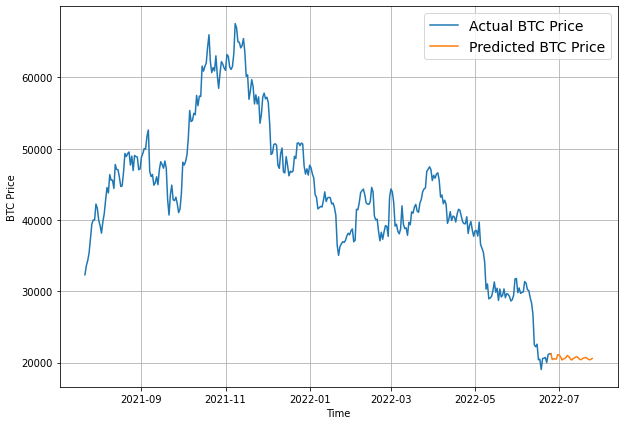

In [199]:
# Plot future prices predictions of Bitcoin
plt.figure(figsize=(10, 7))
plot_time_series(bitcoin_prices.index, btc_price, start=2500, format="-", label="Actual BTC Price")
plot_time_series(next_time_steps, future_forecast, format="-", label="Predicted BTC Price")

Despite the more recent bitcoin price crashes, our model predicts that it will increase and decrease over the next two weeks. Do we believe this? Let's take a look at the turkey problem.

##Model 10: Why forecasting is unreliable (the turkey problem 🦃)

In [173]:
# Let's introduce a turkey prolbem to our BTC data (price of BTC falls 100x in one day)
btc_price_turkey = btc_price.copy()
btc_price_turkey[-1] = btc_price_turkey[-1] / 100

In [174]:
# Manufacture an extra price on the end (to showcase our Turkey problem)
btc_price_turkey[-10:]

[20381.650391,
 20471.482422,
 19017.642578,
 20553.271484,
 20599.537109,
 20710.597656,
 19987.029297,
 21085.876953,
 21231.65625,
 212.36939453]

In [175]:
# Get the timesteps for the turkey problem
btc_timesteps_turkey = np.array(bitcoin_prices.index)
btc_timesteps_turkey[-10:]

array(['2022-06-16T00:00:00.000000000', '2022-06-17T00:00:00.000000000',
       '2022-06-18T00:00:00.000000000', '2022-06-19T00:00:00.000000000',
       '2022-06-20T00:00:00.000000000', '2022-06-21T00:00:00.000000000',
       '2022-06-22T00:00:00.000000000', '2022-06-23T00:00:00.000000000',
       '2022-06-24T00:00:00.000000000', '2022-06-25T00:00:00.000000000'],
      dtype='datetime64[ns]')

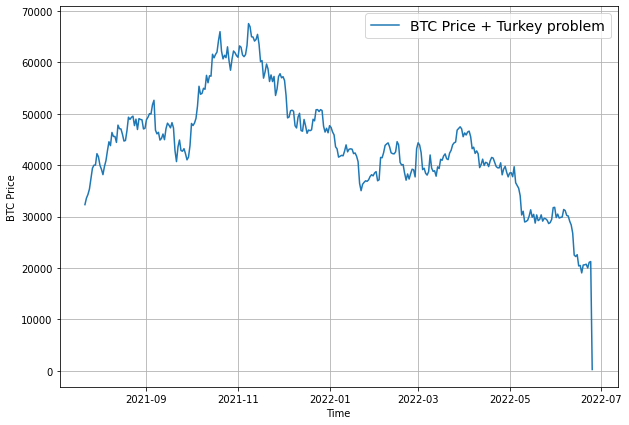

In [176]:
plt.figure(figsize=(10, 7))
plot_time_series(timesteps=btc_timesteps_turkey,
                 values=btc_price_turkey,
                 format="-",
                 label="BTC Price + Turkey problem",
                 start=2500
                 )

In [177]:
HORIZON = 1
WINDOW_SIZE = 7

In [178]:
# Create train and test sets for turkey problem data
full_windows, full_labels = make_windows(np.array(btc_price_turkey), window_size=WINDOW_SIZE, horizon=HORIZON)

X_train, X_test, y_train, y_test = make_train_test_splits(full_windows, full_labels)
len(X_train), len(X_test), len(y_train), len(y_test)

(2265, 567, 2265, 567)

In [179]:
model_1.summary()

Model: "model_1_dense"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               1024      
                                                                 
 dense_1 (Dense)             (None, 1)                 129       
                                                                 
Total params: 1,153
Trainable params: 1,153
Non-trainable params: 0
_________________________________________________________________


In [180]:
# Clone model 1 architecture for turkey model and fit the turkey model on the turkey data
turkey_model = tf.keras.models.clone_model(model_1)
turkey_model._name = "model_10_turkey_model"
turkey_model.compile(loss="mae",
                     optimizer=tf.keras.optimizers.Adam())
turkey_model.fit(X_train, y_train,
                 epochs=100,
                 verbose=0,
                 batch_size=128,
                 validation_data=(X_test, y_test),
                 callbacks=[create_model_checkpoint(turkey_model.name)])

INFO:tensorflow:Assets written to: model_experiments/model_10_turkey_model/assets


INFO:tensorflow:Assets written to: model_experiments/model_10_turkey_model/assets


INFO:tensorflow:Assets written to: model_experiments/model_10_turkey_model/assets


INFO:tensorflow:Assets written to: model_experiments/model_10_turkey_model/assets


INFO:tensorflow:Assets written to: model_experiments/model_10_turkey_model/assets


INFO:tensorflow:Assets written to: model_experiments/model_10_turkey_model/assets


INFO:tensorflow:Assets written to: model_experiments/model_10_turkey_model/assets


INFO:tensorflow:Assets written to: model_experiments/model_10_turkey_model/assets


INFO:tensorflow:Assets written to: model_experiments/model_10_turkey_model/assets


INFO:tensorflow:Assets written to: model_experiments/model_10_turkey_model/assets


INFO:tensorflow:Assets written to: model_experiments/model_10_turkey_model/assets


INFO:tensorflow:Assets written to: model_experiments/model_10_turkey_model/assets


INFO:tensorflow:Assets written to: model_experiments/model_10_turkey_model/assets


INFO:tensorflow:Assets written to: model_experiments/model_10_turkey_model/assets


INFO:tensorflow:Assets written to: model_experiments/model_10_turkey_model/assets


INFO:tensorflow:Assets written to: model_experiments/model_10_turkey_model/assets


INFO:tensorflow:Assets written to: model_experiments/model_10_turkey_model/assets


INFO:tensorflow:Assets written to: model_experiments/model_10_turkey_model/assets


INFO:tensorflow:Assets written to: model_experiments/model_10_turkey_model/assets


INFO:tensorflow:Assets written to: model_experiments/model_10_turkey_model/assets


INFO:tensorflow:Assets written to: model_experiments/model_10_turkey_model/assets


INFO:tensorflow:Assets written to: model_experiments/model_10_turkey_model/assets


INFO:tensorflow:Assets written to: model_experiments/model_10_turkey_model/assets


INFO:tensorflow:Assets written to: model_experiments/model_10_turkey_model/assets


INFO:tensorflow:Assets written to: model_experiments/model_10_turkey_model/assets


INFO:tensorflow:Assets written to: model_experiments/model_10_turkey_model/assets


INFO:tensorflow:Assets written to: model_experiments/model_10_turkey_model/assets


INFO:tensorflow:Assets written to: model_experiments/model_10_turkey_model/assets


INFO:tensorflow:Assets written to: model_experiments/model_10_turkey_model/assets


INFO:tensorflow:Assets written to: model_experiments/model_10_turkey_model/assets


INFO:tensorflow:Assets written to: model_experiments/model_10_turkey_model/assets


INFO:tensorflow:Assets written to: model_experiments/model_10_turkey_model/assets


INFO:tensorflow:Assets written to: model_experiments/model_10_turkey_model/assets


INFO:tensorflow:Assets written to: model_experiments/model_10_turkey_model/assets


INFO:tensorflow:Assets written to: model_experiments/model_10_turkey_model/assets


INFO:tensorflow:Assets written to: model_experiments/model_10_turkey_model/assets


INFO:tensorflow:Assets written to: model_experiments/model_10_turkey_model/assets


INFO:tensorflow:Assets written to: model_experiments/model_10_turkey_model/assets


INFO:tensorflow:Assets written to: model_experiments/model_10_turkey_model/assets


INFO:tensorflow:Assets written to: model_experiments/model_10_turkey_model/assets


INFO:tensorflow:Assets written to: model_experiments/model_10_turkey_model/assets


INFO:tensorflow:Assets written to: model_experiments/model_10_turkey_model/assets


INFO:tensorflow:Assets written to: model_experiments/model_10_turkey_model/assets


INFO:tensorflow:Assets written to: model_experiments/model_10_turkey_model/assets


INFO:tensorflow:Assets written to: model_experiments/model_10_turkey_model/assets


INFO:tensorflow:Assets written to: model_experiments/model_10_turkey_model/assets


INFO:tensorflow:Assets written to: model_experiments/model_10_turkey_model/assets


INFO:tensorflow:Assets written to: model_experiments/model_10_turkey_model/assets


INFO:tensorflow:Assets written to: model_experiments/model_10_turkey_model/assets


INFO:tensorflow:Assets written to: model_experiments/model_10_turkey_model/assets


INFO:tensorflow:Assets written to: model_experiments/model_10_turkey_model/assets


INFO:tensorflow:Assets written to: model_experiments/model_10_turkey_model/assets


INFO:tensorflow:Assets written to: model_experiments/model_10_turkey_model/assets


INFO:tensorflow:Assets written to: model_experiments/model_10_turkey_model/assets


INFO:tensorflow:Assets written to: model_experiments/model_10_turkey_model/assets


INFO:tensorflow:Assets written to: model_experiments/model_10_turkey_model/assets


INFO:tensorflow:Assets written to: model_experiments/model_10_turkey_model/assets


INFO:tensorflow:Assets written to: model_experiments/model_10_turkey_model/assets


INFO:tensorflow:Assets written to: model_experiments/model_10_turkey_model/assets


INFO:tensorflow:Assets written to: model_experiments/model_10_turkey_model/assets


INFO:tensorflow:Assets written to: model_experiments/model_10_turkey_model/assets


INFO:tensorflow:Assets written to: model_experiments/model_10_turkey_model/assets


INFO:tensorflow:Assets written to: model_experiments/model_10_turkey_model/assets


INFO:tensorflow:Assets written to: model_experiments/model_10_turkey_model/assets


INFO:tensorflow:Assets written to: model_experiments/model_10_turkey_model/assets


INFO:tensorflow:Assets written to: model_experiments/model_10_turkey_model/assets


INFO:tensorflow:Assets written to: model_experiments/model_10_turkey_model/assets


INFO:tensorflow:Assets written to: model_experiments/model_10_turkey_model/assets


INFO:tensorflow:Assets written to: model_experiments/model_10_turkey_model/assets


INFO:tensorflow:Assets written to: model_experiments/model_10_turkey_model/assets


INFO:tensorflow:Assets written to: model_experiments/model_10_turkey_model/assets


INFO:tensorflow:Assets written to: model_experiments/model_10_turkey_model/assets


INFO:tensorflow:Assets written to: model_experiments/model_10_turkey_model/assets


INFO:tensorflow:Assets written to: model_experiments/model_10_turkey_model/assets


INFO:tensorflow:Assets written to: model_experiments/model_10_turkey_model/assets


INFO:tensorflow:Assets written to: model_experiments/model_10_turkey_model/assets


In [181]:
# Evaluate model on test data
turkey_model.evaluate(X_test, y_test)

18/18 [==============================] - 0s 2ms/step - loss: 1304.8452


1304.84521484375

In [182]:
# Load best performing turkey model and evaluate on test data
turkey_model = tf.keras.models.load_model("model_experiments/model_10_turkey_model")
turkey_model.evaluate(X_test, y_test)

18/18 [==============================] - 0s 2ms/step - loss: 1284.5243


1284.5242919921875

In [183]:
# Make predictions with turkey model
turkey_preds = make_preds(turkey_model, X_test)
turkey_preds[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([19075.182, 19330.72 , 19220.174, 18458.56 , 18491.107, 18301.314,
       18066.621, 18686.752, 19116.152, 19259.188], dtype=float32)>

In [184]:
# Evaluate turkey preds
turkey_results = evaluate_preds(y_true=y_test,
                                y_pred=turkey_preds)
turkey_results

{'mae': 12442.503,
 'mape': 67.52193,
 'mase': 9.7035885,
 'mse': 239964960.0,
 'rmse': 14878.764}

In [185]:
model_1_results

{'mae': 1256.6902,
 'mape': 2.9990795,
 'mase': 1.0092837,
 'mse': 2986000.2,
 'rmse': 1728.0046}

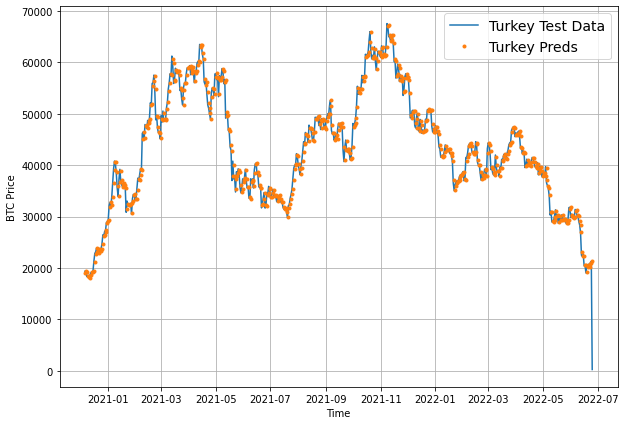

In [186]:
plt.figure(figsize=(10, 7))
offset=0
plot_time_series(timesteps=btc_timesteps_turkey[-len(X_test):],
                 values=btc_price_turkey[-len(y_test):], 
                 format="-",
                 label="Turkey Test Data", 
                 start=offset)
plot_time_series(timesteps=btc_timesteps_turkey[-len(X_test):],
                 values=turkey_preds,
                 label="Turkey Preds",
                 start=offset);

#Model Comparison

In [187]:
ensemble_results

{'mae': 1247.8367,
 'mape': 2.981095,
 'mase': 1.0021731,
 'mse': 2962077.8,
 'rmse': 1721.0687}

In [188]:
# Compare different model results (w = window, h = horizon, e.g. w=7 means a window size of 7)
model_results = pd.DataFrame({"naive_model": naive_results,
                              "model_1_dense_w7_h1": model_1_results,
                              "model_2_dense_w30_h1": model_2_results,
                              "model_3_dense_w30_h7": model_3_results,
                              "model_4_CONV1D": model_4_results,
                              "model_5_LSTM": model_5_results,
                              "model_6_multivariate": model_6_results,
                              "model_7_NBEATS": model_7_results,
                              "model_8_ensemble": ensemble_results,
                              "model_10_turkey": turkey_results}).T
model_results.head(10)

,mae,mse,rmse,mape,mase
naive_model,1243.271606,2.920422e+06,1708.924072,2.960614,0.998507
model_1_dense_w7_h1,1256.690186,2.986000e+06,1728.004639,2.999079,1.009284
model_2_dense_w30_h1,1361.724976,3.317766e+06,1821.473633,3.232889,1.086680
model_3_dense_w30_h7,2707.475586,1.323509e+07,3099.473877,6.510197,2.158323
model_4_CONV1D,1260.671265,3.002294e+06,1732.712769,3.008666,1.012481
model_5_LSTM,1336.958984,3.218401e+06,1793.990234,3.189433,1.073750
model_6_multivariate,1256.016846,2.967614e+06,1722.676270,2.994011,1.008743
model_7_NBEATS,1306.409180,3.147086e+06,1774.002686,3.123023,1.049214
model_8_ensemble,1247.836670,2.962078e+06,1721.068726,2.981095,1.002173
model_10_turkey,12442.502930,2.399650e+08,14878.763672,67.521927,9.703588


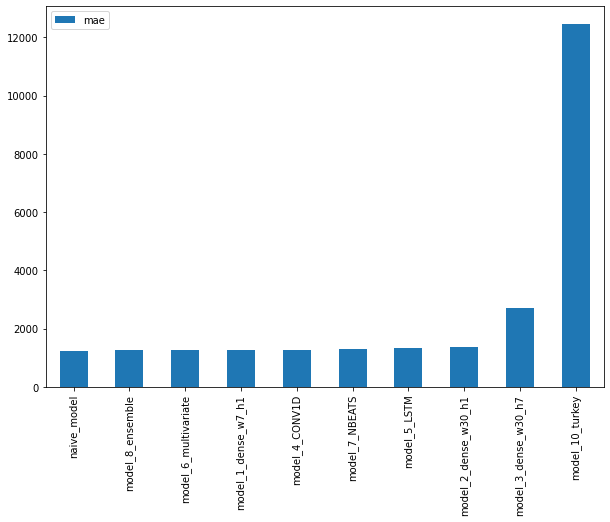

In [189]:
# Sort model results by MAE and plot them 
model_results[["mae"]].sort_values(by="mae").plot(figsize=(10, 7), kind="bar");